<a href="https://colab.research.google.com/github/elazzaouisofiane/01DataMiningTest/blob/main/Abalone_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Pandas as pd
import pandas as pd

# Import Numpy as np
import numpy as np

# Importing the 2 dataset, 2020 as df1 and 2021 as df2
df1 = pd.read_csv('/content/AbaloneDataSet2020.csv')
df2 = pd.read_csv('/content/AbaloneDataSet2021.csv')

# Import warnings library to ignore the FutureWarning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Initial overview of the data
df1.head()

Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  \
0   M       0.455         0.365       0.095          0.5140            0.2245   
1   M       0.350         0.265       0.090          0.2255            0.0995   
2   F       0.530         0.420       0.135          0.6770            0.2565   
3   M       0.440         0.365       0.125          0.5160            0.2155   
4   I       0.330         0.255       0.080          0.2050            0.0895   

   SellWeight(g)  Spots  
0          0.150   15.0  
1          0.070    7.0  
2          0.210    9.0  
3          0.155   10.0  
4          0.055    7.0

In [ ]:
df2.head()

Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  \
0   M       0.425          0.33       0.080          0.3610            0.1340   
1   M       0.470          0.35       0.100          0.4775            0.1885   
2   F       0.400          0.31       0.115          0.3465            0.1475   
3   I       0.370          0.29       0.100          0.2500            0.1025   
4   M       0.500          0.38       0.155          0.6600            0.2655   

   SellWeight(g)  Spots  
0          0.125    7.0  
1          0.175    8.0  
2          0.115   10.0  
3          0.085   10.0  
4          0.215   19.0

In [ ]:
# Initial data exploration: Examine the rows and columns of the datasets.
df1.shape

(4179, 8)

In [ ]:
df2.shape

(2080, 8)

In [ ]:
# Drop rows where all the data is missing or containing null values
df1 = df1.dropna(how = 'all')

In [ ]:
# Verification of df1 shape after null values drop
df1.shape

(2097, 8)

In [ ]:
# Null cells assessment in df1:
df1.isnull().sum()

Sex                 0
Length(mm)          2
Diameter(mm)        1
Height(mm)          1
WholeWeight(g)      1
ShuckedWeight(g)    2
SellWeight(g)       1
Spots               0
dtype: int64

In [ ]:
df1.isnull().sum().sum()

8

In [ ]:
# Null cells assessment in df2:
df2.isnull().sum()

Sex                 0
Length(mm)          3
Diameter(mm)        2
Height(mm)          2
WholeWeight(g)      4
ShuckedWeight(g)    1
SellWeight(g)       2
Spots               1
dtype: int64

In [ ]:
df2.isnull().sum().sum()

15

In [ ]:
# df1 "Sex" values counts
df1_sex_values = df1['Sex'].value_counts()
df1_sex_values

Sex
M    771
I    683
F    641
0      2
Name: count, dtype: int64

In [ ]:
# df2 "Sex" values counts
df2_sex_values = df2['Sex'].value_counts()
df2_sex_values

Sex
M    757
F    666
I    654
0      3
Name: count, dtype: int64

In [ ]:
# 'Sex' column mode
df1_sex_mode = df1['Sex'].mode()
df1_sex_mode

0    M
Name: Sex, dtype: object

In [ ]:
df2_sex_mode = df2['Sex'].mode()
df2_sex_mode

0    M
Name: Sex, dtype: object

In [ ]:
# Replace erroneous values with the mode in 'Sex' column
df1['Sex'].replace({'0':'M'}, inplace=True)
df1['Sex'].value_counts()

<ipython-input-676-bd2147d3944f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'].replace({'0':'M'}, inplace=True)


Sex
M    773
I    683
F    641
Name: count, dtype: int64

In [ ]:
df2['Sex'].replace({'0':'M'}, inplace=True)
df2['Sex'].value_counts()

Sex
M    760
F    666
I    654
Name: count, dtype: int64

In [ ]:
# Replace categorical values with numerical representations
df1['Sex'].replace({'M':0, 'F':1, 'I':2}, inplace=True)
df1['Sex'].value_counts()

<ipython-input-678-9f73911da915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'].replace({'M':0, 'F':1, 'I':2}, inplace=True)


Sex
0    773
2    683
1    641
Name: count, dtype: int64

In [ ]:
df2['Sex'].replace({'M':0, 'F':1, 'I':2}, inplace=True)
df2['Sex'].value_counts()

Sex
0    760
1    666
2    654
Name: count, dtype: int64

In [ ]:
# prompt: can I do the sum of null value and values == 0 in one line?
# I previously used : (df1==0).sum() and df1.isnull().sum()
# but I would like to make the sum of both. Exclude the 'Sex' Column from this query.

((df1 == 0) | df1.isnull()).sum().drop('Sex')

Length(mm)          3
Diameter(mm)        2
Height(mm)          4
WholeWeight(g)      5
ShuckedWeight(g)    6
SellWeight(g)       1
Spots               3
dtype: int64

In [ ]:
((df2 == 0) | df2.isnull()).sum().drop('Sex')

Length(mm)          4
Diameter(mm)        4
Height(mm)          4
WholeWeight(g)      5
ShuckedWeight(g)    2
SellWeight(g)       3
Spots               3
dtype: int64

In [ ]:
# Total missing and null values in each dataset
((df1 == 0) | df1.isnull()).sum().drop('Sex').sum()

24

In [ ]:
((df2 == 0) | df2.isnull()).sum().drop('Sex').sum()

25

In [ ]:
# Replace null and 0 values with medians for specified columns
columns_to_replace = ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)', 'Spots']
medians_df1 = df1[columns_to_replace].median().to_dict()
medians_df2 = df2[columns_to_replace].median().to_dict()

for col in columns_to_replace:
    df1[col].fillna(medians_df1[col], inplace=True)
    df1[col].replace(0, medians_df1[col], inplace=True)
    df2[col].fillna(medians_df2[col], inplace=True)
    df2[col].replace(0, medians_df2[col], inplace=True)

In [ ]:
((df1 == 0) | df1.isnull()).sum().drop('Sex').sum()

0

In [ ]:
((df2 == 0) | df2.isnull()).sum().drop('Sex').sum()

0

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
# Spots is a categorical colum which will be altered in int64
df1['Spots'] = df1['Spots'].astype('int64')
df2['Spots'] = df2['Spots'].astype('int64')

In [ ]:
# info() method is employed to examine the structure and data types of each datasets
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2097 non-null   int64  
 1   Length(mm)        2097 non-null   float64
 2   Diameter(mm)      2097 non-null   float64
 3   Height(mm)        2097 non-null   float64
 4   WholeWeight(g)    2097 non-null   float64
 5   ShuckedWeight(g)  2097 non-null   float64
 6   SellWeight(g)     2097 non-null   float64
 7   Spots             2097 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 147.4 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2080 non-null   int64  
 1   Length(mm)        2080 non-null   float64
 2   Diameter(mm)      2080 non-null   float64
 3   Height(mm)        2080 non-null   float64
 4   WholeWeight(g)    2080 non-null   float64
 5   ShuckedWeight(g)  2080 non-null   float64
 6   SellWeight(g)     2080 non-null   float64
 7   Spots             2080 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 130.1 KB


In [ ]:
# Generate descriptive statistics for numerical variables in df1
df1.describe()

Sex   Length(mm)  Diameter(mm)   Height(mm)  WholeWeight(g)  \
count  2097.000000  2097.000000   2097.000000  2097.000000     2097.000000   
mean      0.957082     0.521075      0.405734     0.139103        0.819833   
std       0.832354     0.121605      0.100864     0.044934        0.494467   
min       0.000000     0.075000      0.055000     0.010000        0.002000   
25%       0.000000     0.450000      0.345000     0.115000        0.433000   
50%       1.000000     0.540000      0.420000     0.140000        0.792000   
75%       2.000000     0.610000      0.480000     0.165000        1.133000   
max       2.000000     0.815000      0.650000     1.130000        2.825500   

       ShuckedWeight(g)  SellWeight(g)        Spots  
count       2097.000000    2097.000000  2097.000000  
mean           0.355744       0.235820     9.883643  
std            0.224577       0.140633     3.276653  
min            0.001000       0.001500     1.000000  
25%            0.181000       0.122000     8.000000  
50%            0.332500       0.230000     9.000000  
75%            0.495500       0.322500    11.000000  
max            1.488000       1.005000    29.000000

In [ ]:
# Generate descriptive statistics for numerical variables in df2
df2.describe()

Sex   Length(mm)  Diameter(mm)   Height(mm)  WholeWeight(g)  \
count  2080.000000  2080.000000   2080.000000  2080.000000     2080.000000   
mean      0.949038     0.526959      0.409988     0.139969        0.838139   
std       0.823126     0.118349      0.097281     0.038124        0.485562   
min       0.000000     0.130000      0.095000     0.015000        0.010500   
25%       0.000000     0.455000      0.350000     0.115000        0.449500   
50%       1.000000     0.545000      0.425000     0.145000        0.808500   
75%       2.000000     0.620000      0.485000     0.170000        1.167000   
max       2.000000     0.800000      0.615000     0.250000        2.548000   

       ShuckedWeight(g)  SellWeight(g)       Spots  
count       2080.000000    2080.000000  2080.00000  
mean           0.362941       0.241587     9.98750  
std            0.218918       0.137468     3.16818  
min            0.005000       0.003500     3.00000  
25%            0.190500       0.133375     8.00000  
50%            0.341000       0.236000    10.00000  
75%            0.506625       0.331625    11.00000  
max            1.253000       0.885000    27.00000

In [ ]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

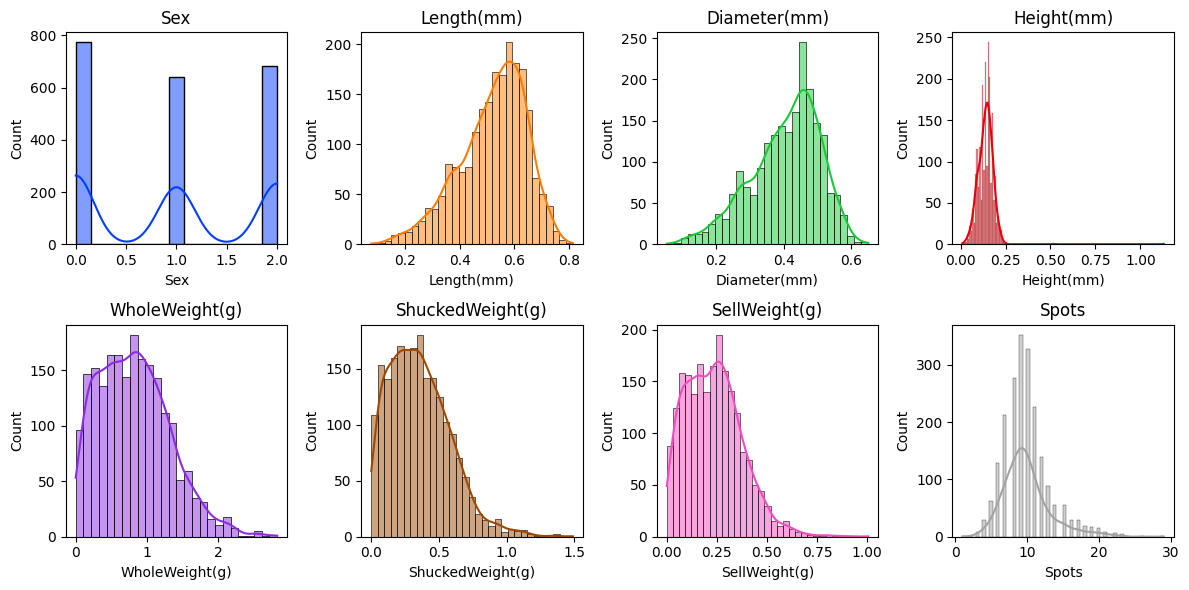

In [ ]:
# Initial data visualisations
plt.figure(figsize=(12,6))
plotnumber=1
colors = sns.color_palette('bright')
for plotnumber, col in enumerate(['Sex','Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)',
                                  'Spots'], start=1):
  ax=plt.subplot(2,4,plotnumber)
  sns.histplot(df1[col], kde=True, ax = ax,color=colors[plotnumber-1])
  ax.set_title(col)
plt.tight_layout()
plt.show()

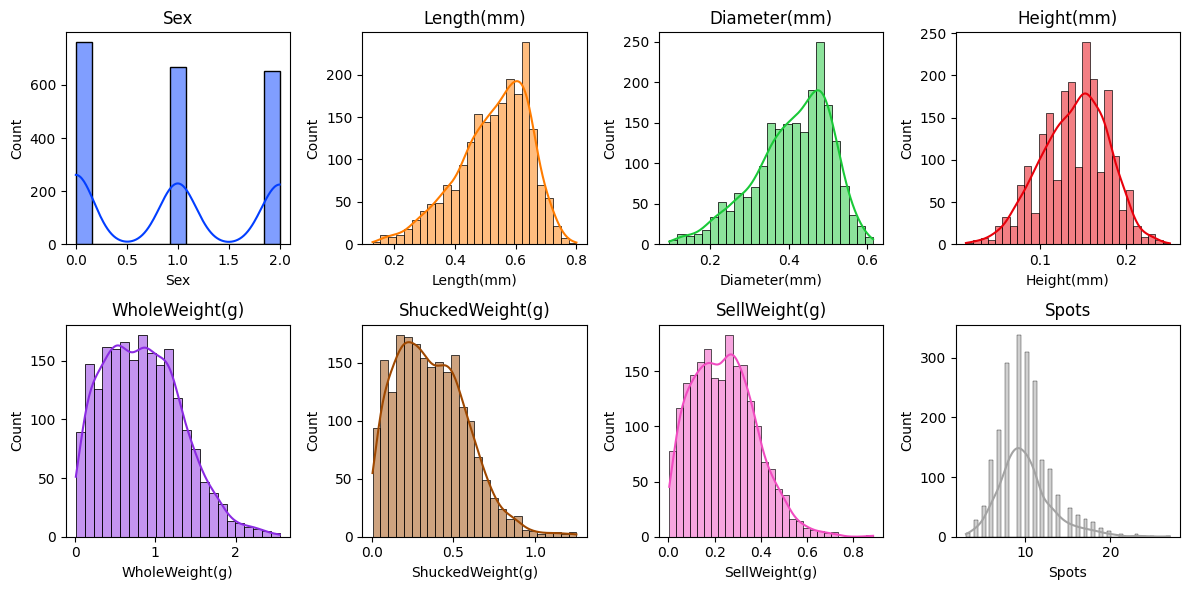

In [ ]:
# Initial df2 data visualisations
plt.figure(figsize=(12,6))
plotnumber=1
colors = sns.color_palette('bright')
for plotnumber, col in enumerate(['Sex','Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)',
                                  'Spots'], start=1):
  ax=plt.subplot(2,4,plotnumber)
  sns.histplot(df2[col], kde=True, ax = ax, color=colors[plotnumber-1])
  ax.set_title(col)
plt.tight_layout()
plt.show()

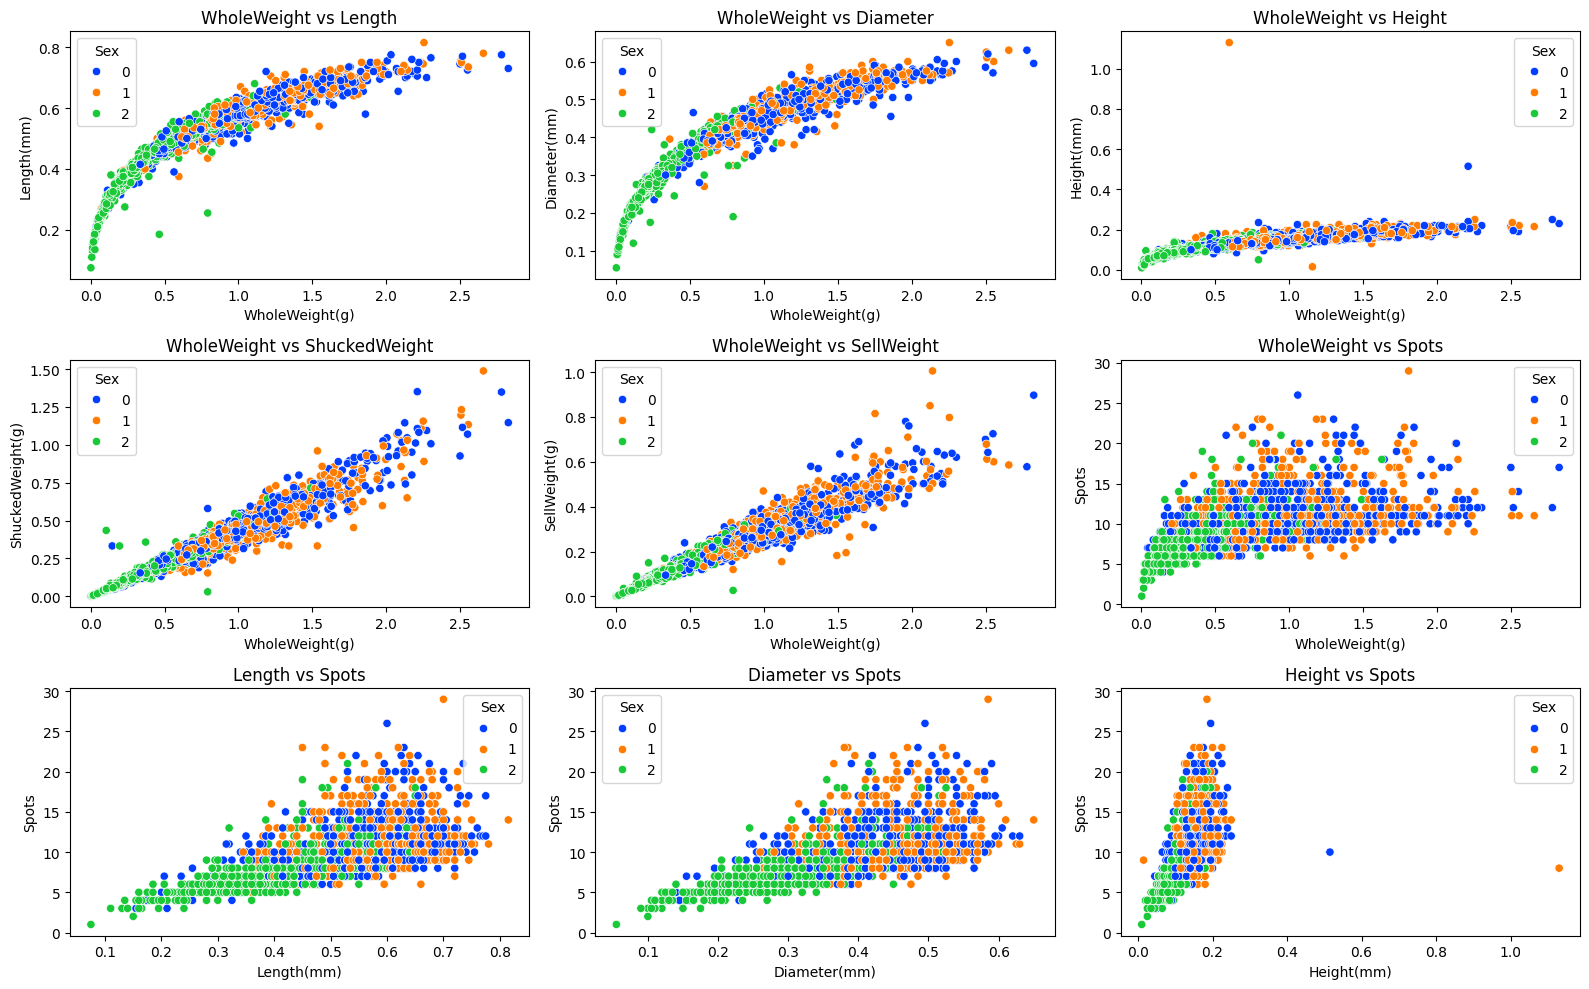

In [ ]:
# Variables relationships assessment using scatterplots, and outliers detection
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Define plot details
plots = [
    ('WholeWeight(g)', 'Length(mm)', 'WholeWeight vs Length'),
    ('WholeWeight(g)', 'Diameter(mm)', 'WholeWeight vs Diameter'),
    ('WholeWeight(g)', 'Height(mm)', 'WholeWeight vs Height'),
    ('WholeWeight(g)', 'ShuckedWeight(g)', 'WholeWeight vs ShuckedWeight'),
    ('WholeWeight(g)', 'SellWeight(g)', 'WholeWeight vs SellWeight'),
    ('WholeWeight(g)', 'Spots', 'WholeWeight vs Spots'),
    ('Length(mm)', 'Spots', 'Length vs Spots'),
    ('Diameter(mm)', 'Spots', 'Diameter vs Spots'),
    ('Height(mm)', 'Spots', 'Height vs Spots')
]

# Loop through plot details and create scatterplots
for i, (x_col, y_col, title) in enumerate(plots):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df1, x=x_col, y=y_col, hue='Sex', palette='bright', ax=axes[row, col])
    axes[row, col].set_title(title)

plt.tight_layout()
plt.show()

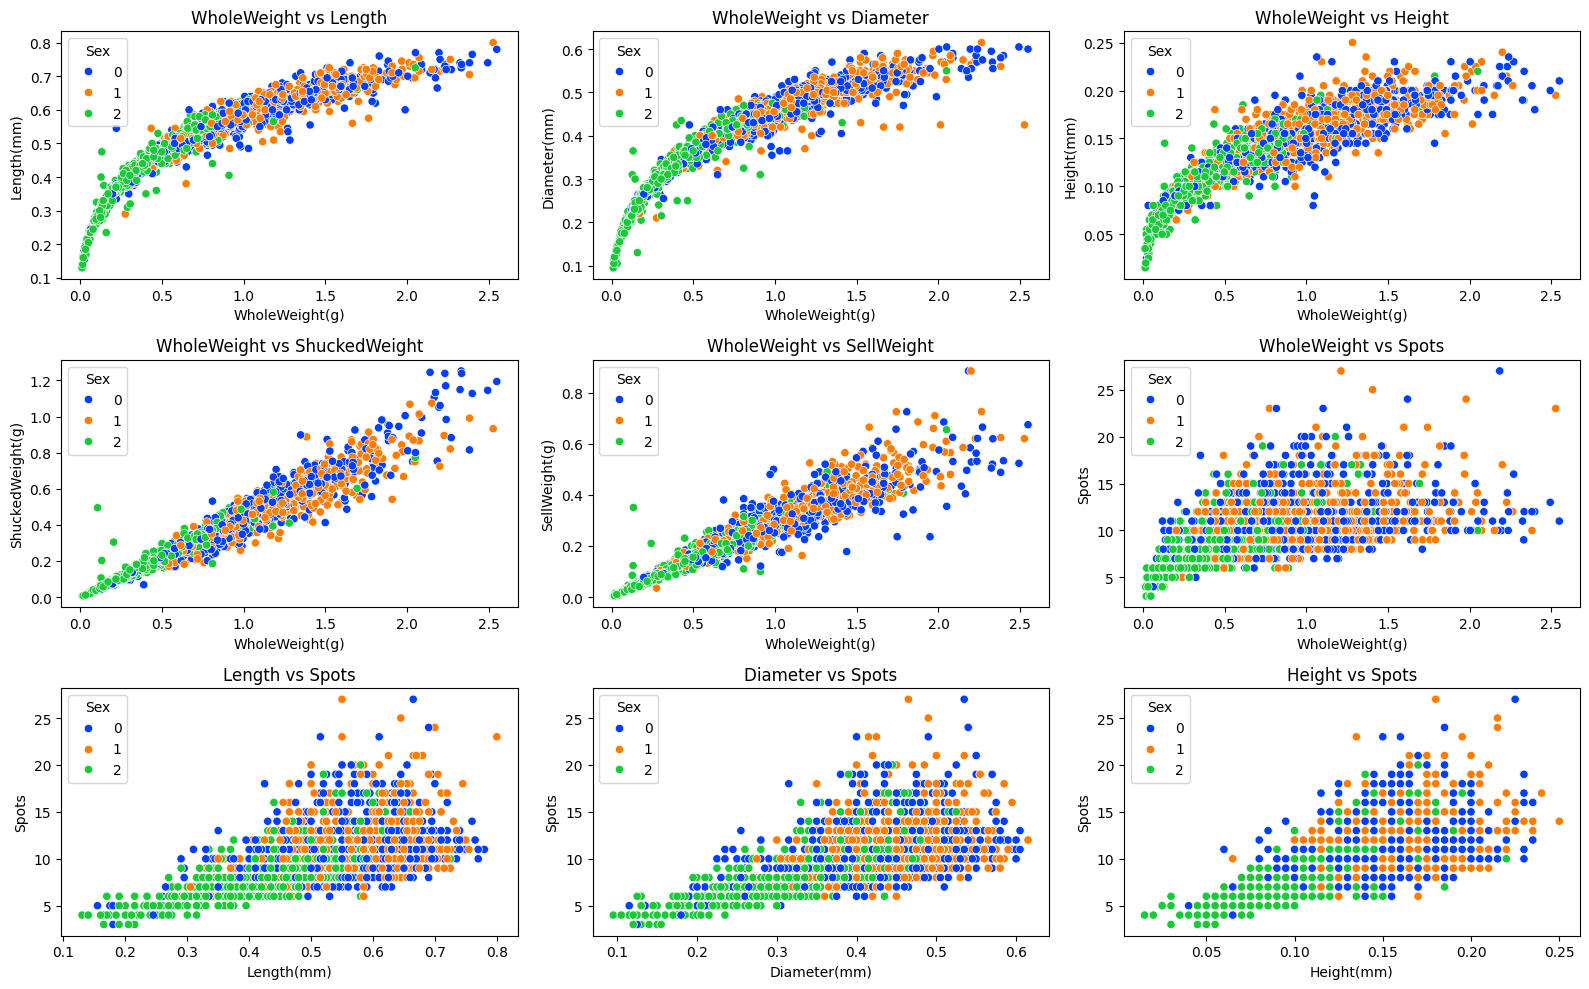

In [ ]:
# Variables relationships assessment using scatterplots, and outliers detection
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Define plot details
plots = [
    ('WholeWeight(g)', 'Length(mm)', 'WholeWeight vs Length'),
    ('WholeWeight(g)', 'Diameter(mm)', 'WholeWeight vs Diameter'),
    ('WholeWeight(g)', 'Height(mm)', 'WholeWeight vs Height'),
    ('WholeWeight(g)', 'ShuckedWeight(g)', 'WholeWeight vs ShuckedWeight'),
    ('WholeWeight(g)', 'SellWeight(g)', 'WholeWeight vs SellWeight'),
    ('WholeWeight(g)', 'Spots', 'WholeWeight vs Spots'),
    ('Length(mm)', 'Spots', 'Length vs Spots'),
    ('Diameter(mm)', 'Spots', 'Diameter vs Spots'),
    ('Height(mm)', 'Spots', 'Height vs Spots')
]

# Loop through plot details and create scatterplots
for i, (x_col, y_col, title) in enumerate(plots):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df2, x=x_col, y=y_col, hue='Sex', palette='bright', ax=axes[row, col])
    axes[row, col].set_title(title)

plt.tight_layout()
plt.show()

In [ ]:
# Remove irrelevant columns

cleaned_df1=df1.drop(['Sex','Spots'], axis=1)
cleaned_df2=df2.drop(['Sex','Spots'], axis=1)

cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2096
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Length(mm)        2097 non-null   float64
 1   Diameter(mm)      2097 non-null   float64
 2   Height(mm)        2097 non-null   float64
 3   WholeWeight(g)    2097 non-null   float64
 4   ShuckedWeight(g)  2097 non-null   float64
 5   SellWeight(g)     2097 non-null   float64
dtypes: float64(6)
memory usage: 114.7 KB


In [ ]:
cleaned_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Length(mm)        2080 non-null   float64
 1   Diameter(mm)      2080 non-null   float64
 2   Height(mm)        2080 non-null   float64
 3   WholeWeight(g)    2080 non-null   float64
 4   ShuckedWeight(g)  2080 non-null   float64
 5   SellWeight(g)     2080 non-null   float64
dtypes: float64(6)
memory usage: 97.6 KB


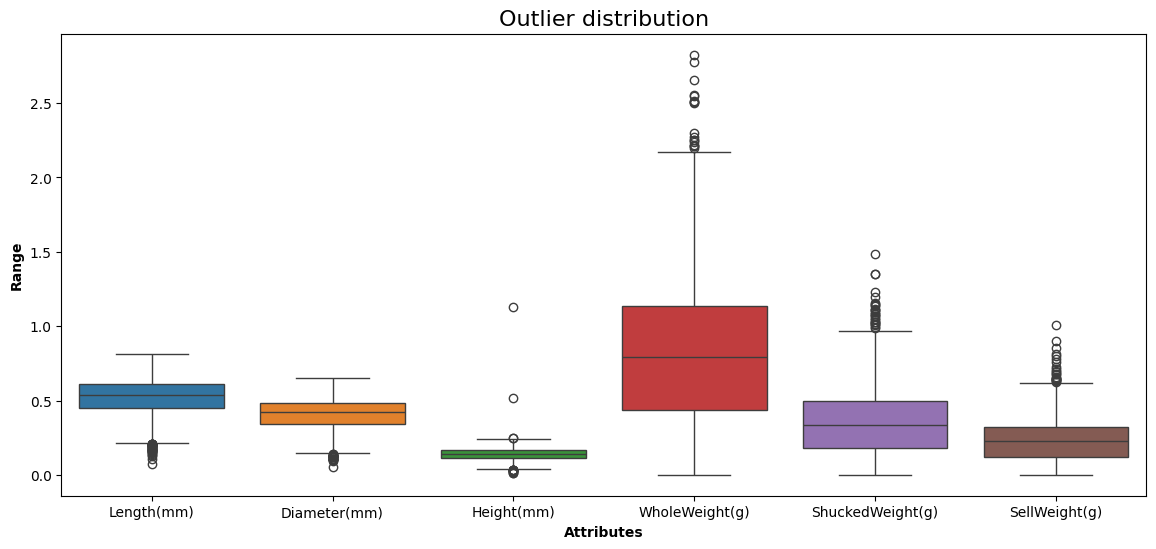

In [ ]:
# Show data plot
def show_boxplot(df):
  plt.rcParams['figure.figsize']=[14,6]
  sns.boxplot(data=df, orient='v')
  plt.title("Outlier distribution", fontsize=16)
  plt.ylabel("Range", fontweight='bold')
  plt.xlabel("Attributes", fontweight='bold')
  plt.show()
show_boxplot(cleaned_df1)

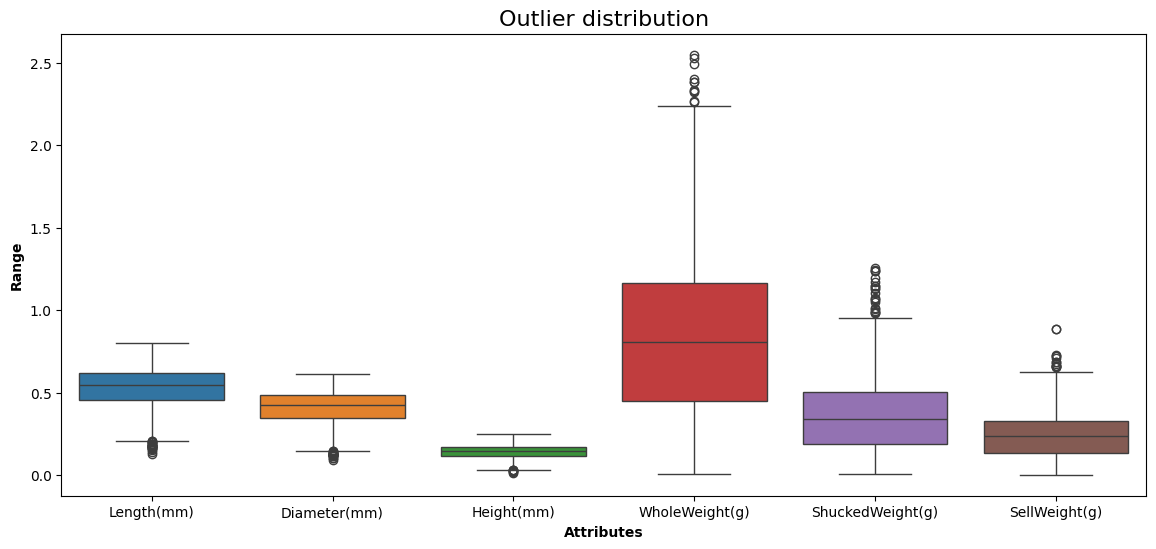

In [ ]:
show_boxplot(cleaned_df2)

In [ ]:
# Remove the outlier using 25/75 IQR method

def remove_outliers(data):
  df=data.copy()

  # compute the interquantile range

  for col in list(df.columns):
    Q1=df[str(col)].quantile(0.25)
    Q3=df[str(col)].quantile(0.75)

    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[str(col)]>=lower_bound) & (df[str(col)]<=upper_bound)]
  return df

without_outliers_df1=remove_outliers(cleaned_df1)
without_outliers_df2=remove_outliers(cleaned_df2)

without_outliers_df1.shape

(2011, 6)

In [ ]:
without_outliers_df2.shape

(2018, 6)

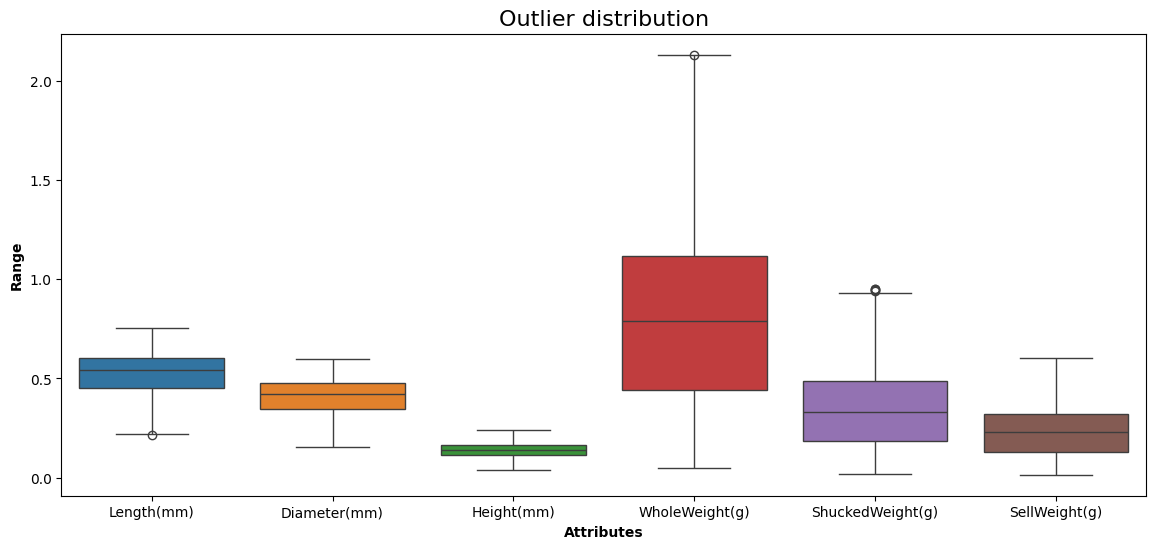

In [ ]:
show_boxplot(without_outliers_df1)

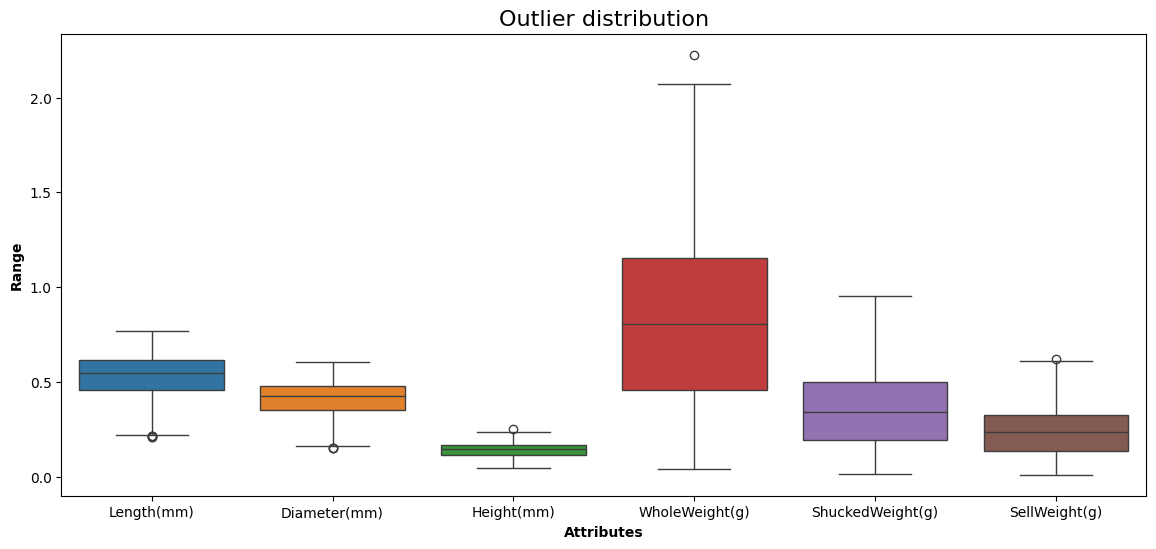

In [ ]:
show_boxplot(without_outliers_df2)

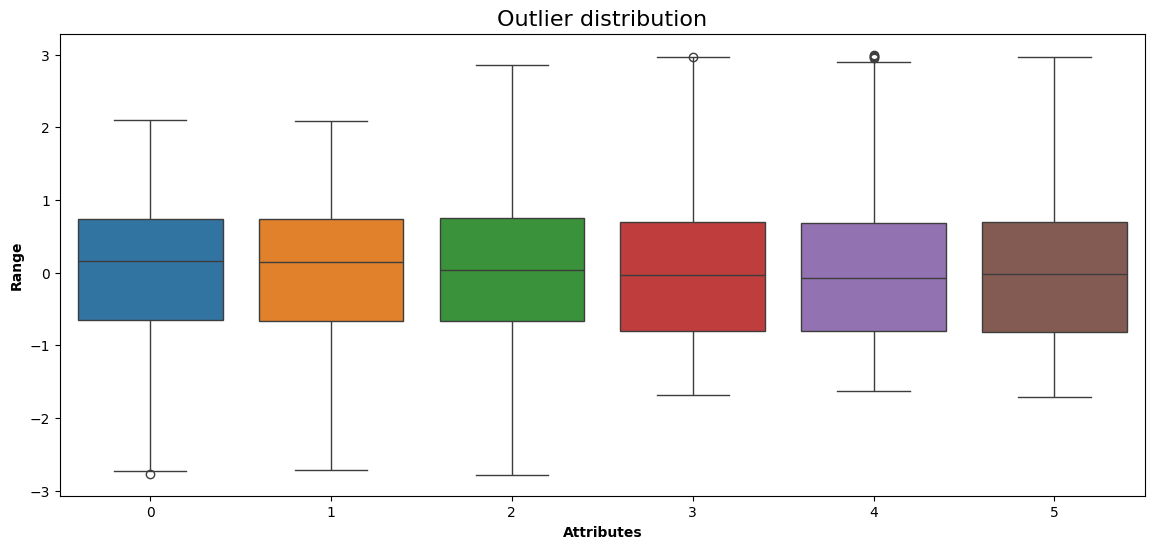

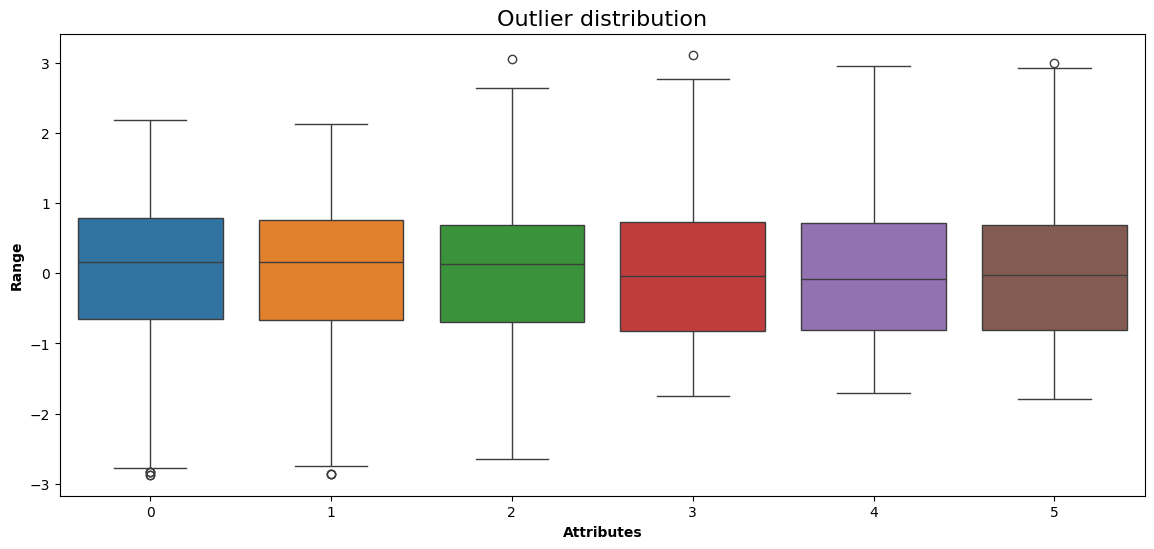

In [ ]:
# Rescale the data to give a better global data visualisation
from sklearn.preprocessing import StandardScaler
data_scaler=StandardScaler()
scaled_data_df1=data_scaler.fit_transform(without_outliers_df1)
scaled_data_df2=data_scaler.fit_transform(without_outliers_df2)
scaled_data_df1.shape
scaled_data_df2.shape
show_boxplot(scaled_data_df1)
show_boxplot(scaled_data_df2)

In [ ]:
# Create a copy of df1 to avoid modifying the original dataframe
df1_without_outliers = df1.copy()

# Get the indices of rows that are not outliers according to the IQR method
valid_rows_indices = without_outliers_df1.index

# Keep only the rows in df1_without_outliers that are not outliers
df1_without_outliers = df1_without_outliers.loc[valid_rows_indices]

# Print the shape of the new dataframe to check the number of rows removed
df1_without_outliers.shape

(2011, 8)

In [ ]:
# create a copy of df2 to avoid modifying the original dataframe
df2_without_outliers = df2.copy()

# Get the indices of rows that are not outliers according to the IQR method
valid_rows_indices = without_outliers_df2.index

# Keep only the rows in df2_without_outliers that are not outliers
df2_without_outliers = df2_without_outliers.loc[valid_rows_indices]

# Print the shape of the new dataframe to check the number of rows removed
df2_without_outliers.shape

(2018, 8)

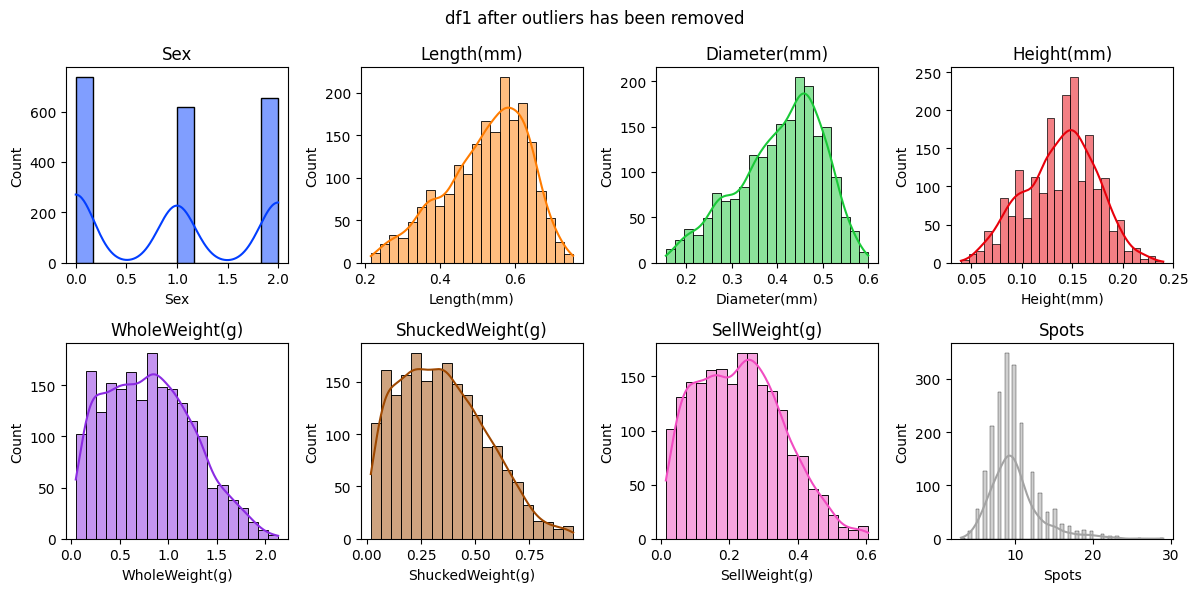

In [ ]:
# data visualisations after outliers removal for df1
plt.figure(figsize=(12,6))
plt.suptitle('df1 after outliers has been removed')

plotnumber=1
colors = sns.color_palette('bright')
for plotnumber, col in enumerate(['Sex','Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)',
                                  'SellWeight(g)','Spots'], start=1):
  ax=plt.subplot(2,4,plotnumber)
  sns.histplot(df1_without_outliers[col], kde=True, ax = ax, color=colors[plotnumber-1])
  ax.set_title(col)
plt.tight_layout()
plt.show()

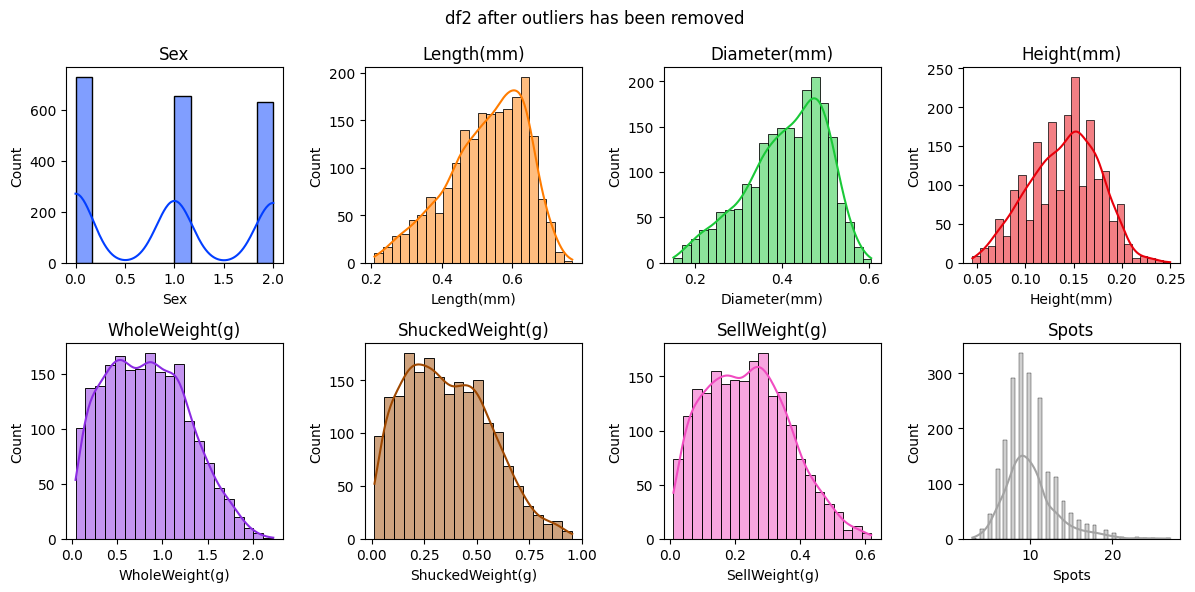

In [ ]:
# data visualisations after outliers removal for df2
plt.figure(figsize=(12,6))
plt.suptitle('df2 after outliers has been removed')

plotnumber=1
colors = sns.color_palette('bright')
for plotnumber, col in enumerate(['Sex','Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)',
                                  'SellWeight(g)', 'Spots'], start=1):
  ax=plt.subplot(2,4,plotnumber)
  sns.histplot(df2_without_outliers[col], kde=True, ax = ax, color=colors[plotnumber-1])
  ax.set_title(col)
plt.tight_layout()
plt.show()

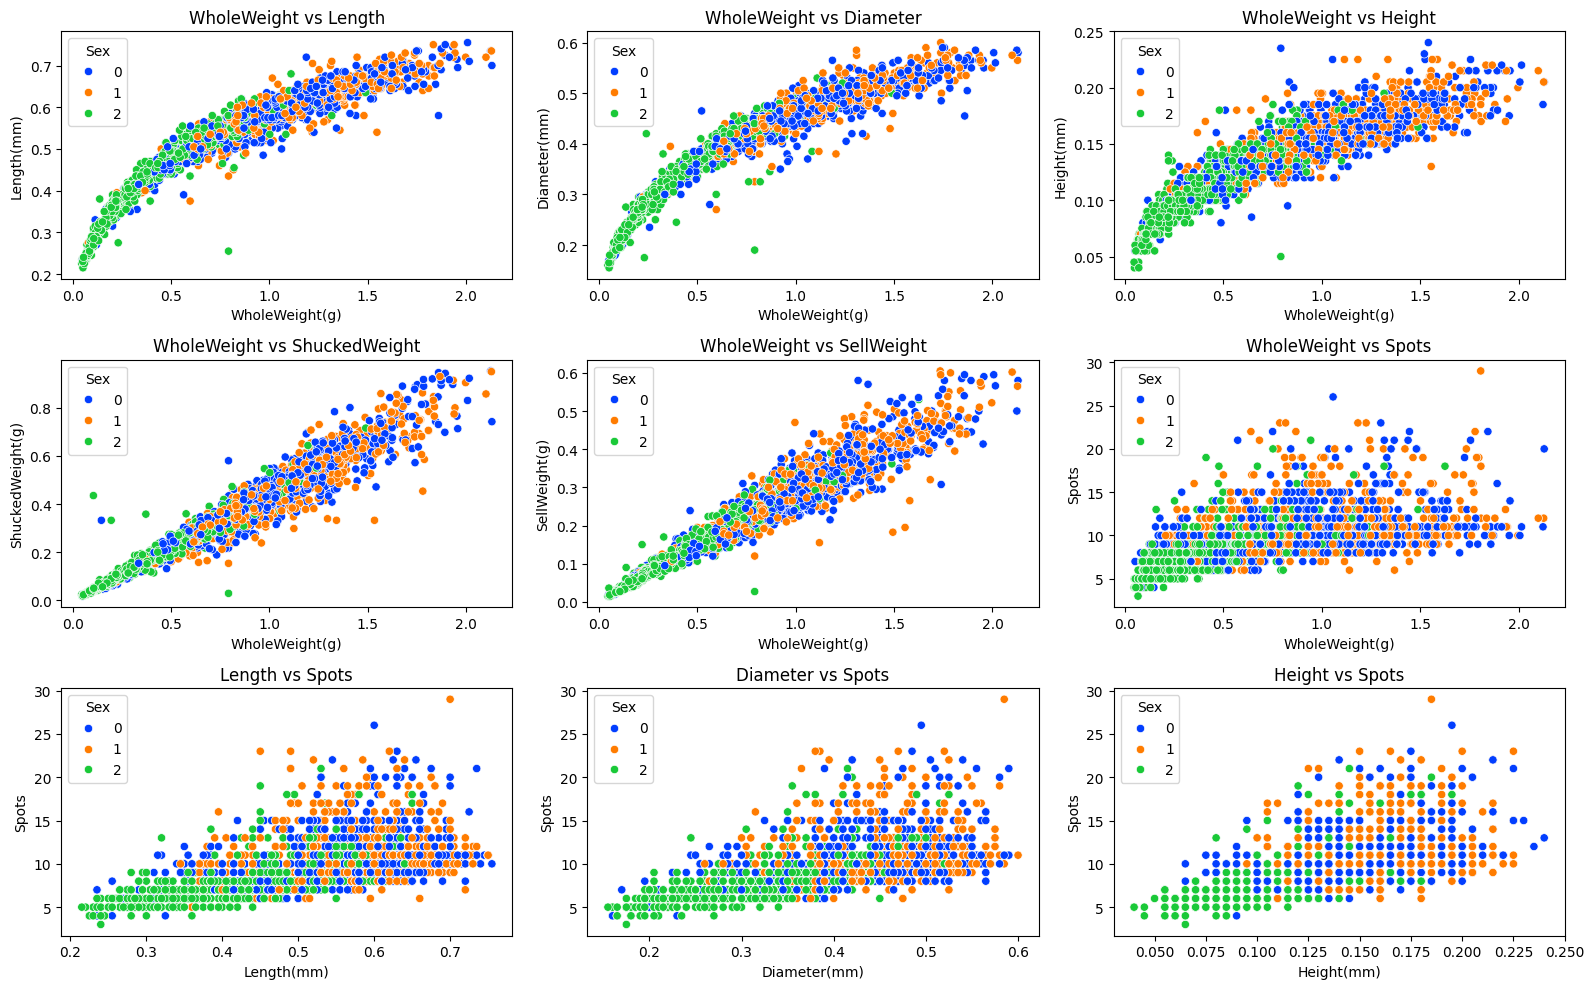

In [ ]:
# Variables relationships assessment using scatterplots, and outliers detection
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Define plot details
plots = [
    ('WholeWeight(g)', 'Length(mm)', 'WholeWeight vs Length'),
    ('WholeWeight(g)', 'Diameter(mm)', 'WholeWeight vs Diameter'),
    ('WholeWeight(g)', 'Height(mm)', 'WholeWeight vs Height'),
    ('WholeWeight(g)', 'ShuckedWeight(g)', 'WholeWeight vs ShuckedWeight'),
    ('WholeWeight(g)', 'SellWeight(g)', 'WholeWeight vs SellWeight'),
    ('WholeWeight(g)', 'Spots', 'WholeWeight vs Spots'),
    ('Length(mm)', 'Spots', 'Length vs Spots'),
    ('Diameter(mm)', 'Spots', 'Diameter vs Spots'),
    ('Height(mm)', 'Spots', 'Height vs Spots')
]

# Loop through plot details and create scatterplots
for i, (x_col, y_col, title) in enumerate(plots):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df1_without_outliers, x=x_col, y=y_col, hue='Sex', palette='bright', ax=axes[row, col])
    axes[row, col].set_title(title)

plt.tight_layout()
plt.show()

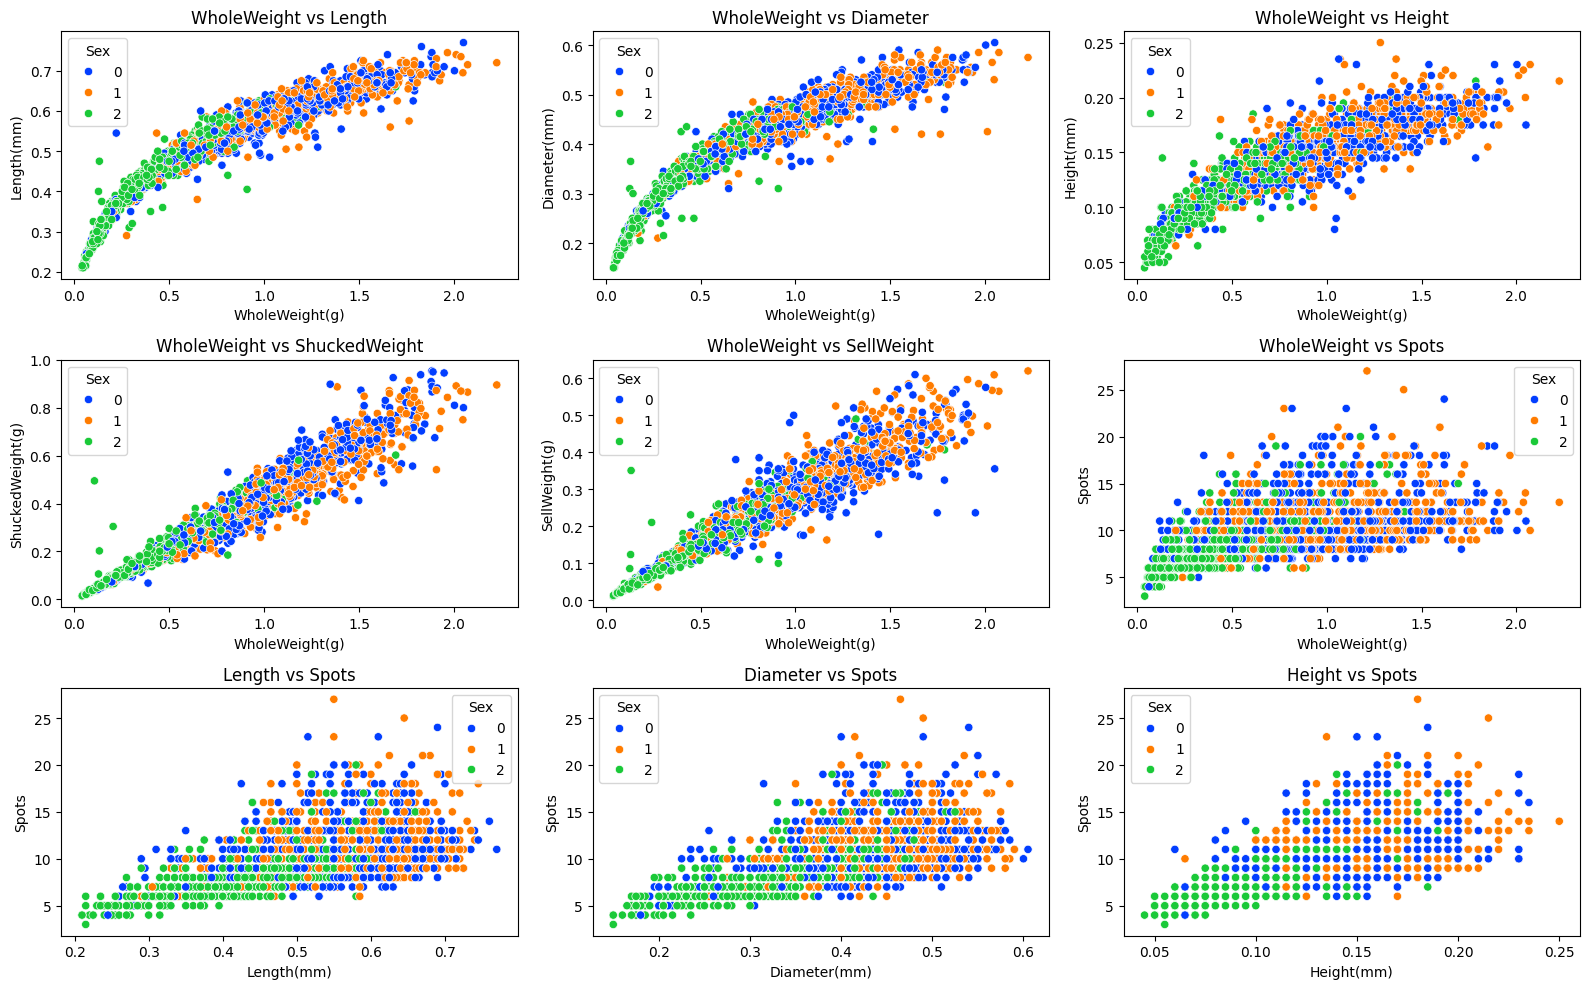

In [ ]:
# Variables relationships assessment using scatterplots, and outliers detection
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Define plot details
plots = [
    ('WholeWeight(g)', 'Length(mm)', 'WholeWeight vs Length'),
    ('WholeWeight(g)', 'Diameter(mm)', 'WholeWeight vs Diameter'),
    ('WholeWeight(g)', 'Height(mm)', 'WholeWeight vs Height'),
    ('WholeWeight(g)', 'ShuckedWeight(g)', 'WholeWeight vs ShuckedWeight'),
    ('WholeWeight(g)', 'SellWeight(g)', 'WholeWeight vs SellWeight'),
    ('WholeWeight(g)', 'Spots', 'WholeWeight vs Spots'),
    ('Length(mm)', 'Spots', 'Length vs Spots'),
    ('Diameter(mm)', 'Spots', 'Diameter vs Spots'),
    ('Height(mm)', 'Spots', 'Height vs Spots')
]

# Loop through plot details and create scatterplots
for i, (x_col, y_col, title) in enumerate(plots):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df2_without_outliers, x=x_col, y=y_col, hue='Sex', palette='bright', ax=axes[row, col])
    axes[row, col].set_title(title)

plt.tight_layout()
plt.show()

In [ ]:
df1_without_outliers.shape

(2011, 8)

In [ ]:
df2_without_outliers.shape

(2018, 8)

In [ ]:
# Descriptive statistics and groups comparisons
df1_without_outliers.describe()

Sex   Length(mm)  Diameter(mm)   Height(mm)  WholeWeight(g)  \
count  2011.000000  2011.000000   2011.000000  2011.000000     2011.000000   
mean      0.957235     0.522442      0.406626     0.138565        0.802343   
std       0.831088     0.110872      0.092559     0.035442        0.447617   
min       0.000000     0.215000      0.155000     0.040000        0.046500   
25%       0.000000     0.450000      0.345000     0.115000        0.441250   
50%       1.000000     0.540000      0.420000     0.140000        0.790500   
75%       2.000000     0.605000      0.475000     0.165000        1.115750   
max       2.000000     0.755000      0.600000     0.240000        2.130000   

       ShuckedWeight(g)  SellWeight(g)        Spots  
count       2011.000000    2011.000000  2011.000000  
mean           0.347493       0.230689     9.906514  
std            0.201608       0.125875     3.175812  
min            0.018000       0.015000     3.000000  
25%            0.185500       0.127500     8.000000  
50%            0.332000       0.229000     9.000000  
75%            0.484500       0.318500    11.000000  
max            0.952000       0.605000    29.000000

In [ ]:
df2_without_outliers.describe()

Sex   Length(mm)  Diameter(mm)   Height(mm)  WholeWeight(g)  \
count  2018.000000  2018.000000   2018.000000  2018.000000     2018.000000   
mean      0.951437     0.527780      0.410746     0.140012        0.824210   
std       0.820909     0.110723      0.091353     0.035987        0.450271   
min       0.000000     0.210000      0.150000     0.045000        0.040000   
25%       0.000000     0.455000      0.350000     0.115000        0.455625   
50%       1.000000     0.545000      0.425000     0.145000        0.806750   
75%       2.000000     0.615000      0.480000     0.165000        1.152500   
max       2.000000     0.770000      0.605000     0.250000        2.226000   

       ShuckedWeight(g)  SellWeight(g)        Spots  
count       2018.000000    2018.000000  2018.000000  
mean           0.356523       0.237936     9.997027  
std            0.201882       0.127399     3.064016  
min            0.013500       0.010500     3.000000  
25%            0.192000       0.135000     8.000000  
50%            0.339500       0.235000    10.000000  
75%            0.500375       0.325750    11.000000  
max            0.954000       0.620000    27.000000

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
df1_without_outliers.corr().style.background_gradient(cmap='magma')

In [ ]:
df2_without_outliers.corr().style.background_gradient(cmap='magma')

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

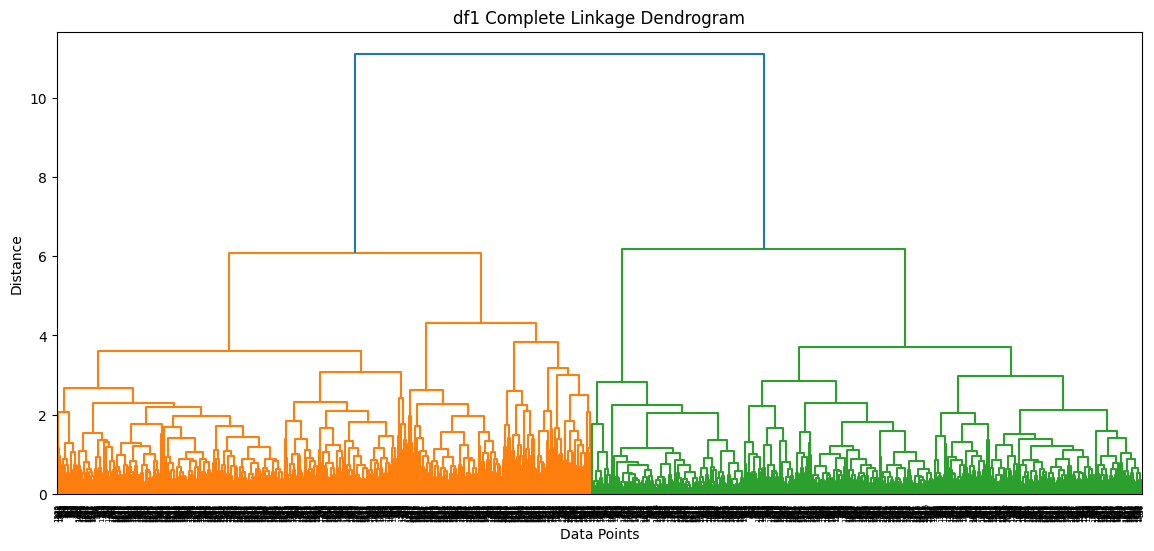

In [ ]:
# use the complete linkage with the  Euckidean distance on df1
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# from scipy.spatial.distance import pdist

# Perform clustering
complete_clustering_df1 = linkage(scaled_data_df1, method='complete', metric='euclidean')

dendrogram(complete_clustering_df1)
plt.title('df1 Complete Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

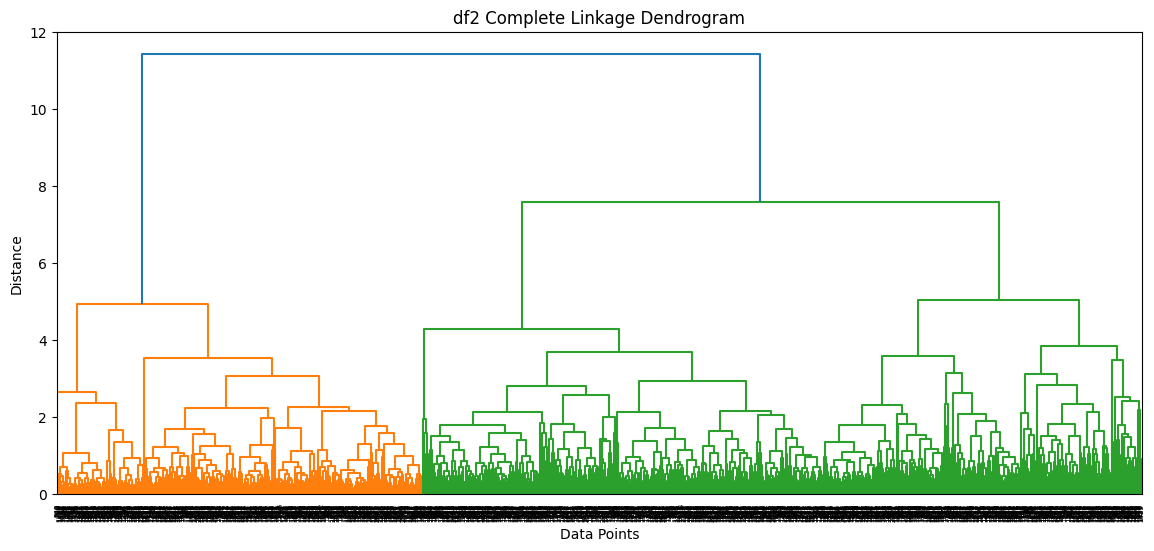

In [ ]:
# use the complete linkage with the  Euckidean distance on df2
complete_clustering_df2 = linkage(scaled_data_df2, method='complete', metric='euclidean')

dendrogram(complete_clustering_df2)
plt.title('df2 Complete Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

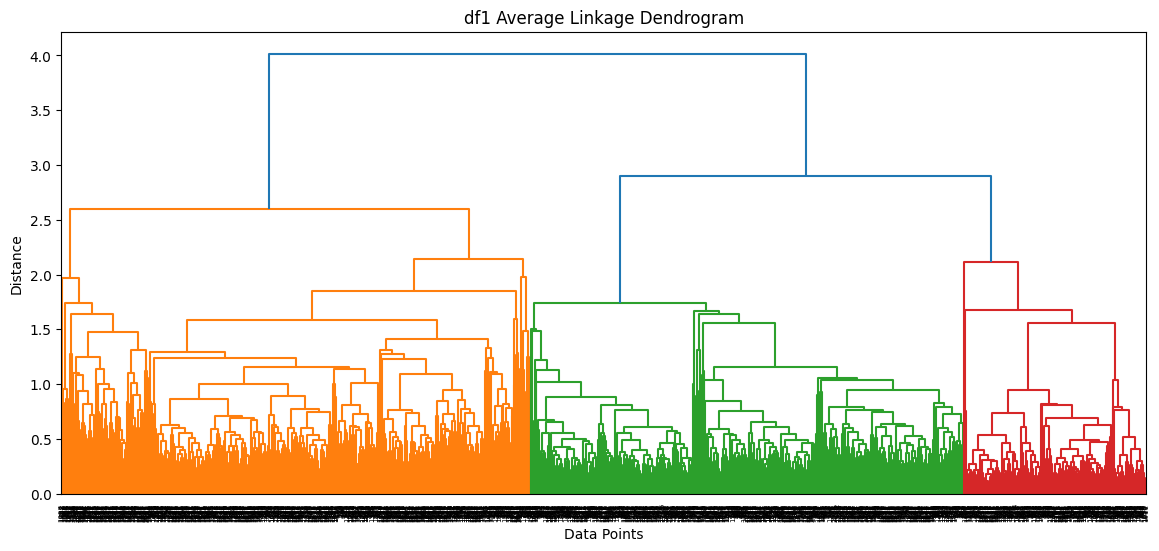

In [ ]:
# use the average linkage with the Eucklidean distance on df1

average_clustering_df1 = linkage(scaled_data_df1, method='average', metric='euclidean')

dendrogram(average_clustering_df1)
plt.title('df1 Average Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

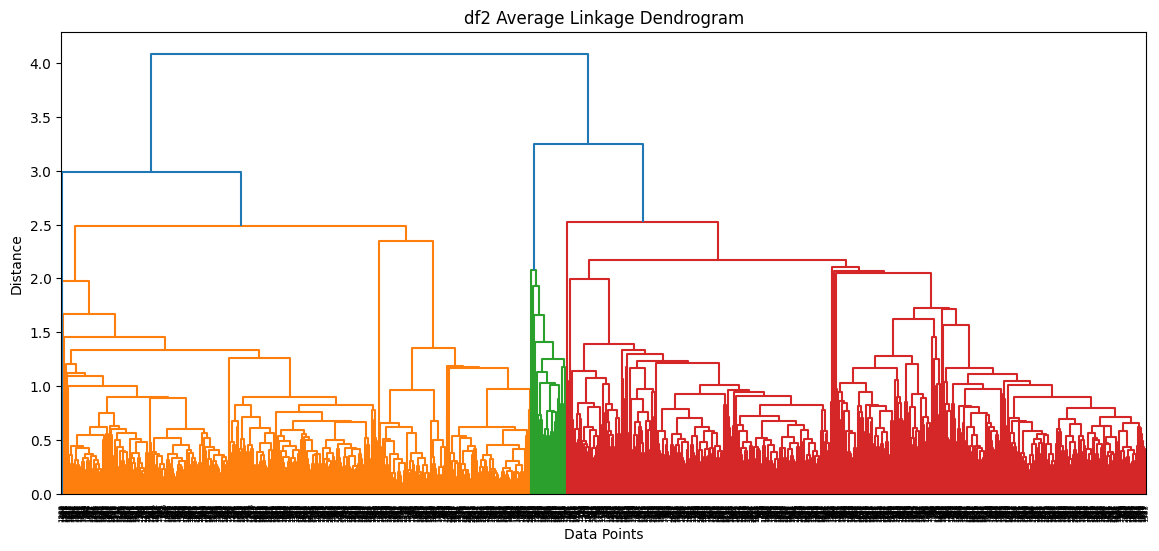

In [ ]:
# use the average linkage with the Eucklidean distance on df2

average_clustering_df2 = linkage(scaled_data_df2, method='average', metric='euclidean')

dendrogram(average_clustering_df2)
plt.title('df2 Average Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

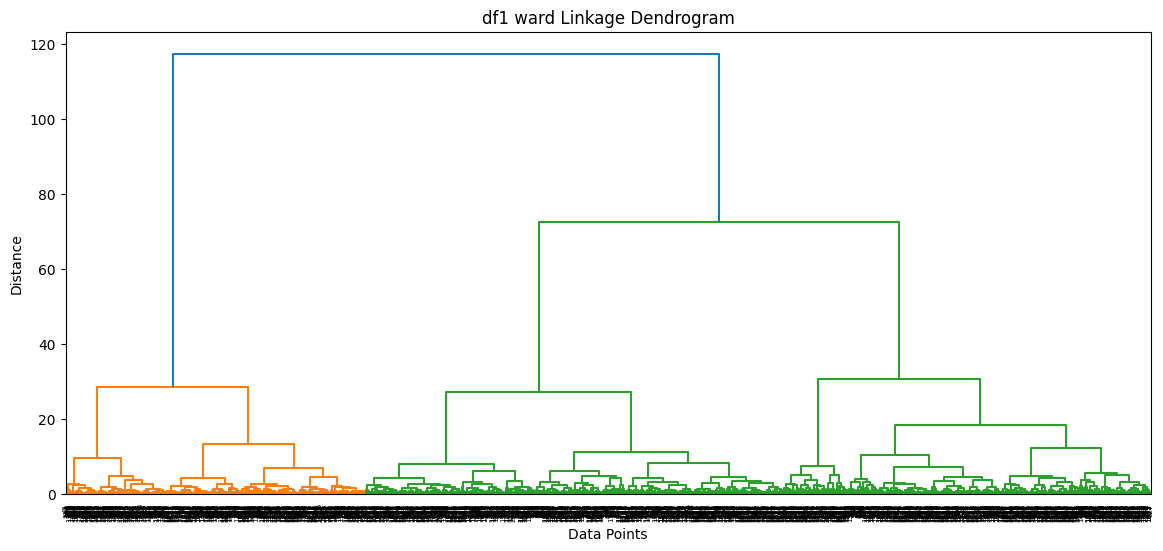

In [ ]:
# use the ward linkage with the Eucklidean distance on df1
ward_clustering_df1 = linkage(scaled_data_df1, method='ward', metric='euclidean')

dendrogram(ward_clustering_df1)
plt.title('df1 ward Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

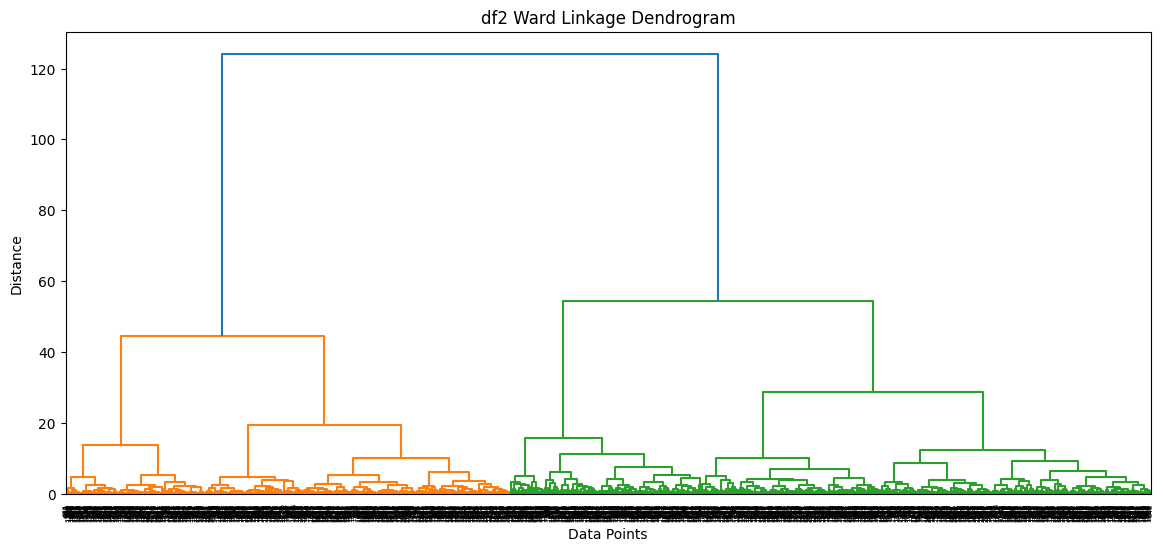

In [ ]:
# use the ward linkage with the Eucklidean distance on df2

ward_clustering_df2 = linkage(scaled_data_df2, method='ward', metric='euclidean')

dendrogram(ward_clustering_df2)
plt.title('df2 Ward Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

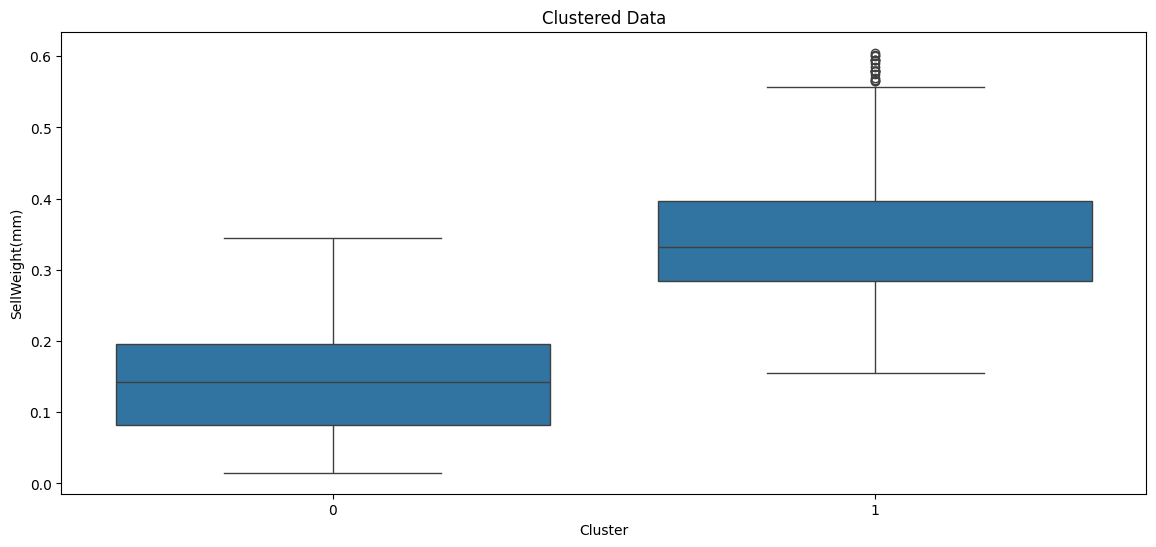

In [ ]:
from threading import current_thread
# Perform hierarchical clustering on the scaled data
cluster_labels_df1 = cut_tree(average_clustering_df1, n_clusters=2).reshape(-1, )
cluster_labels_df2 = cut_tree(average_clustering_df2, n_clusters=2).reshape(-1, )

# Add the cluster labels to the original data
without_outliers_df1['Cluster'] = cluster_labels_df1
without_outliers_df2['Cluster'] = cluster_labels_df2

# Visualize the clusters
sns.boxplot(x='Cluster', y='SellWeight(g)', data=without_outliers_df1)
plt.title('Clustered Data')
plt.xlabel('Cluster')
plt.ylabel('SellWeight(mm)')
plt.show()

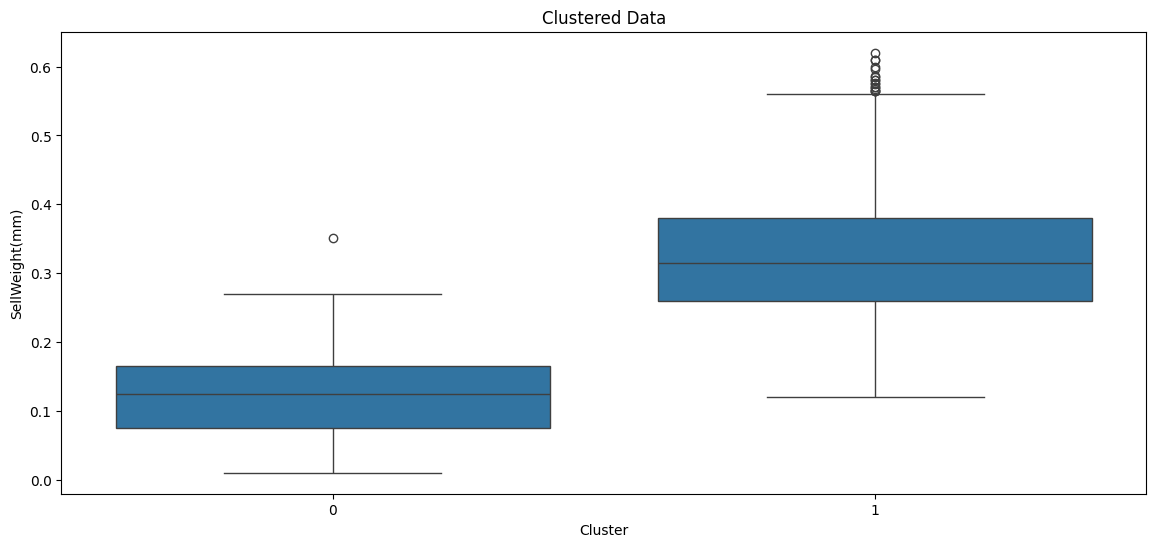

In [ ]:
sns.boxplot(x='Cluster', y='SellWeight(g)', data=without_outliers_df2)
plt.title('Clustered Data')
plt.xlabel('Cluster')
plt.ylabel('SellWeight(mm)')
plt.show()

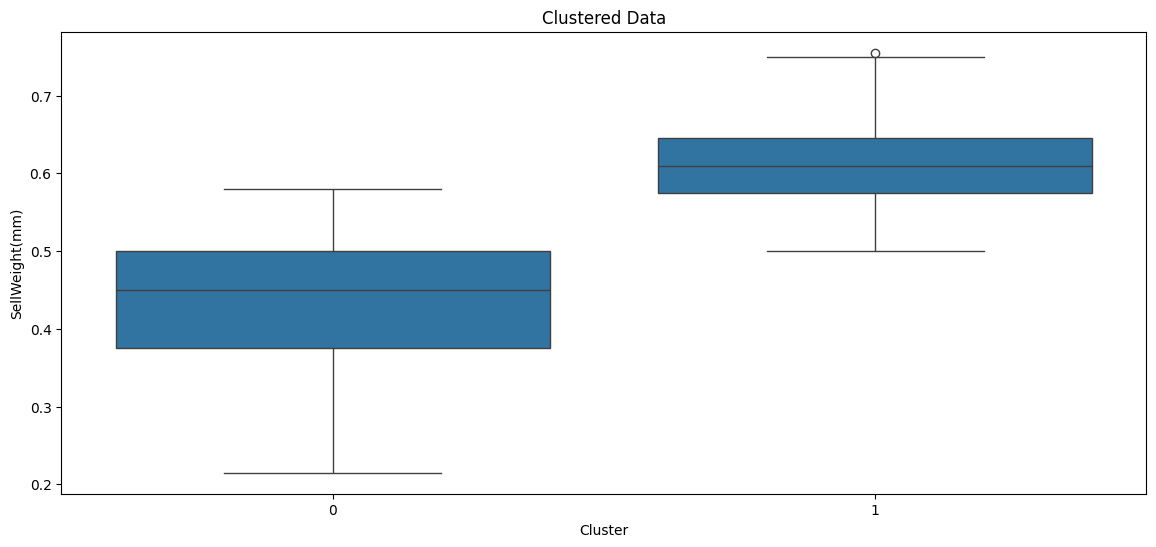

In [ ]:
# Perform hierarchical clustering on the scaled data
cluster_labels_df1 = cut_tree(complete_clustering_df1, n_clusters=2).reshape(-1, )
cluster_labels_df2 = cut_tree(complete_clustering_df2, n_clusters=2).reshape(-1, )

# Add the cluster labels to the original data
without_outliers_df1['Cluster'] = cluster_labels_df1
without_outliers_df2['Cluster'] = cluster_labels_df2

# Visualize the clusters
sns.boxplot(x='Cluster', y='Length(mm)', data=without_outliers_df1)
plt.title('Clustered Data')
plt.xlabel('Cluster')
plt.ylabel('SellWeight(mm)')
plt.show()

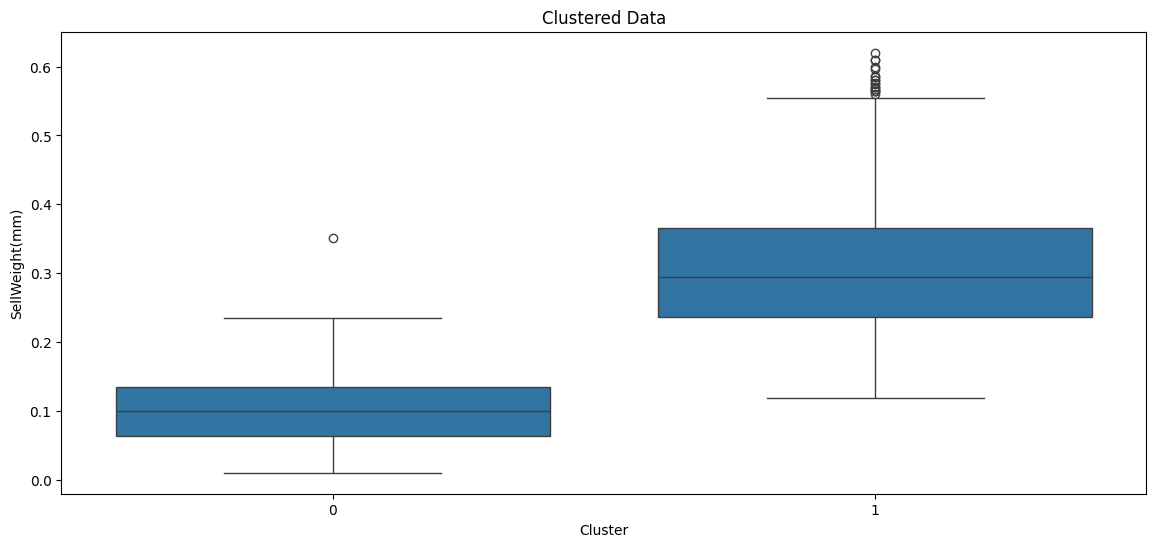

In [ ]:
sns.boxplot(x='Cluster', y='SellWeight(g)', data=without_outliers_df2)
plt.title('Clustered Data')
plt.xlabel('Cluster')
plt.ylabel('SellWeight(mm)')
plt.show()

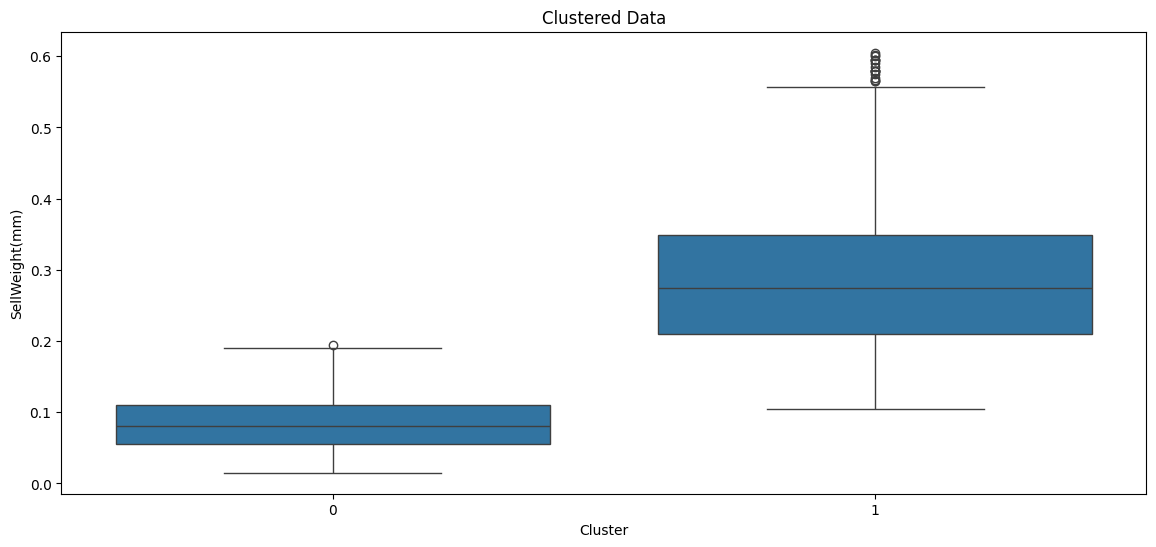

In [ ]:
# Perform hierarchical clustering on the scaled data
cluster_labels_df1 = cut_tree(ward_clustering_df1, n_clusters=2).reshape(-1, )
cluster_labels_df2 = cut_tree(ward_clustering_df2, n_clusters=2).reshape(-1, )

# Add the cluster labels to the original data
without_outliers_df1['Cluster'] = cluster_labels_df1
without_outliers_df2['Cluster'] = cluster_labels_df2

# Visualize the clusters
sns.boxplot(x='Cluster', y='SellWeight(g)', data=without_outliers_df1)
plt.title('Clustered Data')
plt.xlabel('Cluster')
plt.ylabel('SellWeight(mm)')
plt.show()

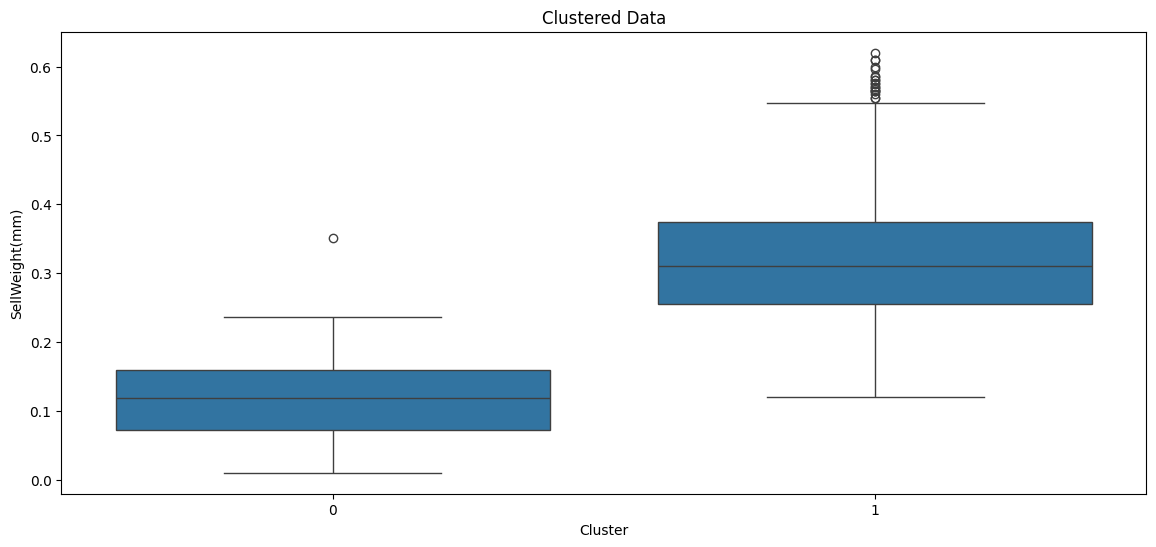

In [ ]:
sns.boxplot(x='Cluster', y='SellWeight(g)', data=without_outliers_df2)
plt.title('Clustered Data')
plt.xlabel('Cluster')
plt.ylabel('SellWeight(mm)')
plt.show()

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

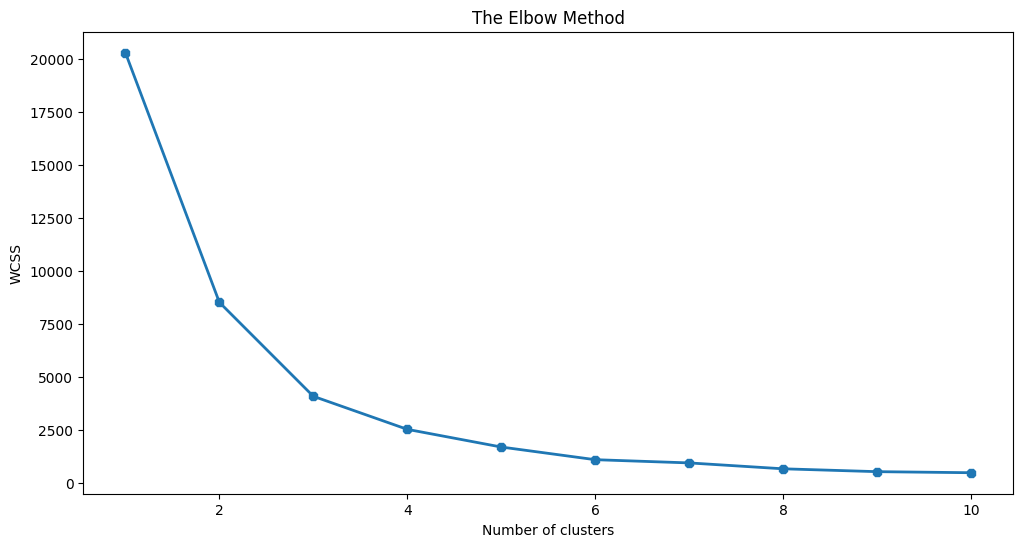

In [ ]:
# First investigation - Spots vs SellWeight

# import the kmeans library and more

import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

X1= df1_without_outliers.loc[:,['Spots','SellWeight(g)']]

wcss=[]

# Select random observation as centroids - Choose the number of clusters (k) and select random for each cluster

for k in range (1,11):

  # call the classifier

  kmeans = KMeans(n_clusters=k, init='k-means++')

  # fit the model

  kmeans.fit(X1)

  # calculate squared error for the clustered points

  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, linewidth=2, marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# predict the model
kmeans = KMeans(n_clusters=2)
labels= kmeans.fit(X1)

Text(0, 0.5, 'SellWeight(g)')

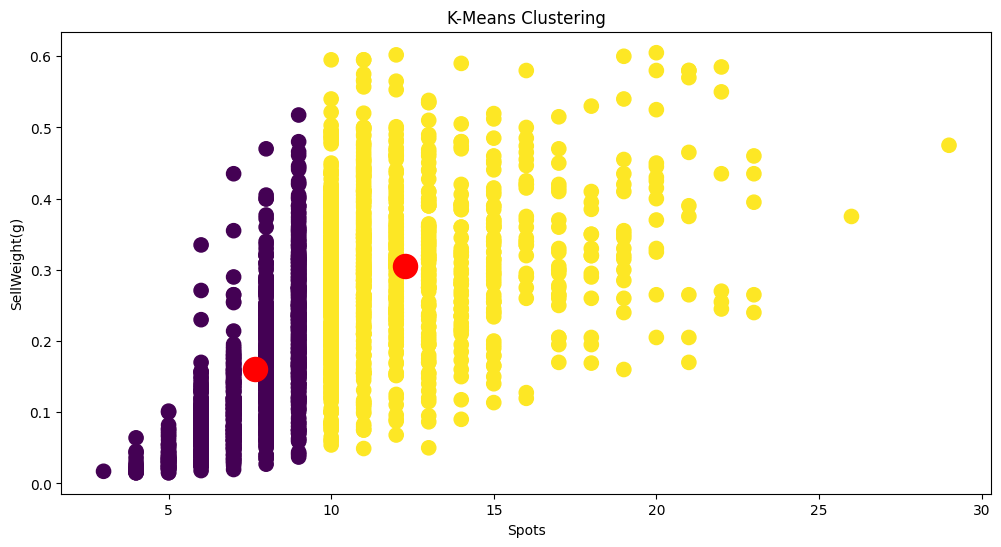

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X1['Spots'], X1['SellWeight(g)'], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Spots')
plt.ylabel('SellWeight(g)')

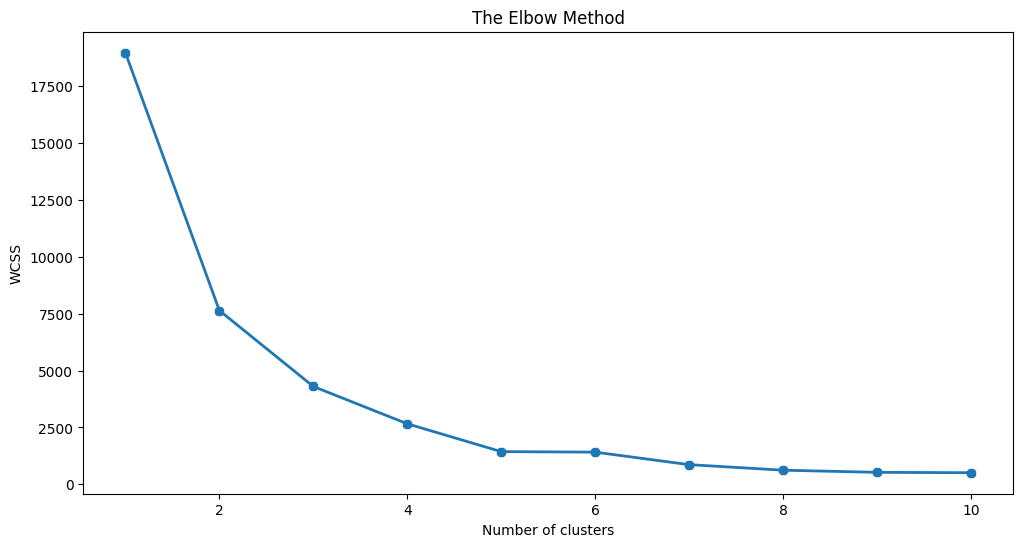

In [ ]:
X2= df2_without_outliers.loc[:,['Spots','SellWeight(g)']]

wcss=[]

# Select random observation as centroids - Choose the number of clusters (k) and select random for each cluster

for k in range (1,11):

  # call the classifier

  kmeans = KMeans(n_clusters=k, init='k-means++')

  # fit the model

  kmeans.fit(X2)

  # calculate squared error for the clustered points

  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, linewidth=2, marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# predict the model
kmeans = KMeans(n_clusters=2)
labels= kmeans.fit(X2)

Text(0, 0.5, 'SellWeight(g)')

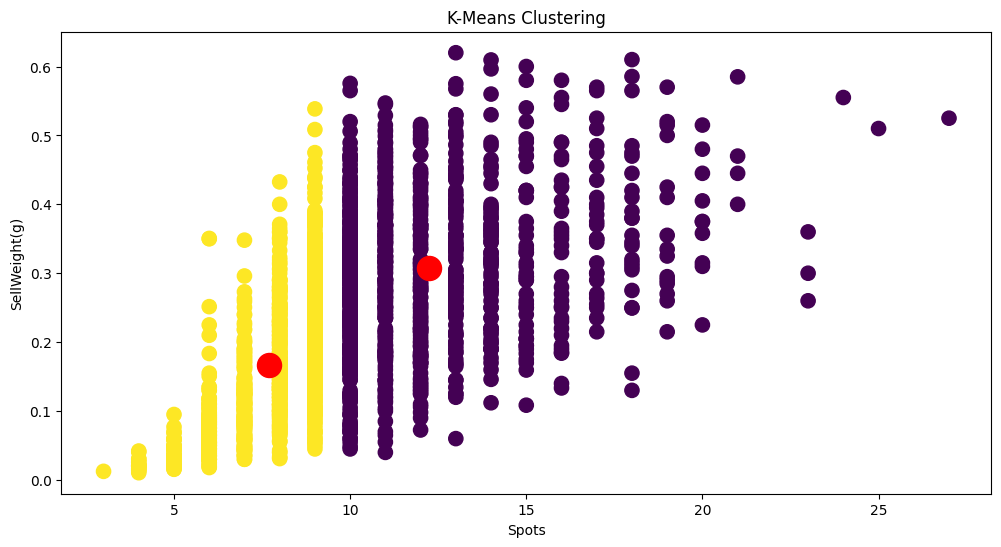

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X2['Spots'], X2['SellWeight(g)'], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Spots')
plt.ylabel('SellWeight(g)')

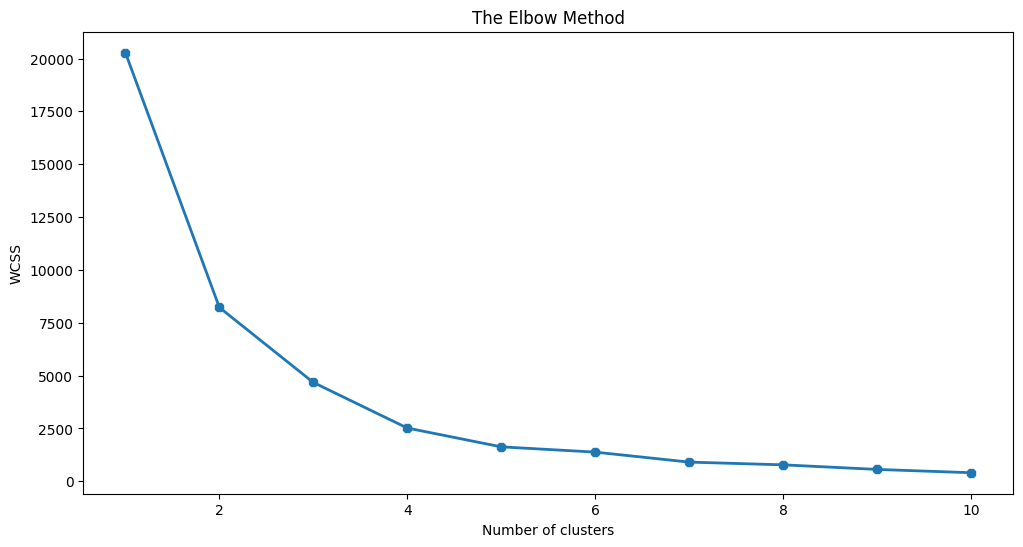

In [ ]:
# Second investigation - Spots vs Height

X3= df1_without_outliers.loc[:,['Spots','Height(mm)']]

wcss=[]

# Select random observation as centroids - Choose the number of clusters (k) and select random for each cluster

for k in range (1,11):

  # call the classifier

  kmeans = KMeans(n_clusters=k, init='k-means++')

  # fit the model

  kmeans.fit(X3)

  # calculate squared error for the clustered points

  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, linewidth=2, marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# predict the model
kmeans = KMeans(n_clusters=2)
labels= kmeans.fit(X3)

Text(0, 0.5, 'Height(mm)')

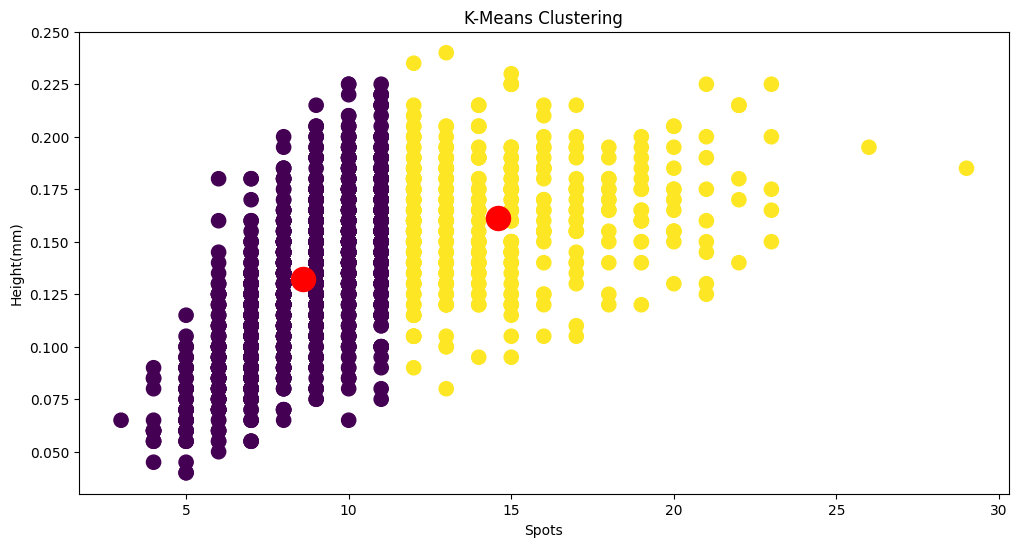

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X3['Spots'], X3['Height(mm)'], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Spots')
plt.ylabel('Height(mm)')

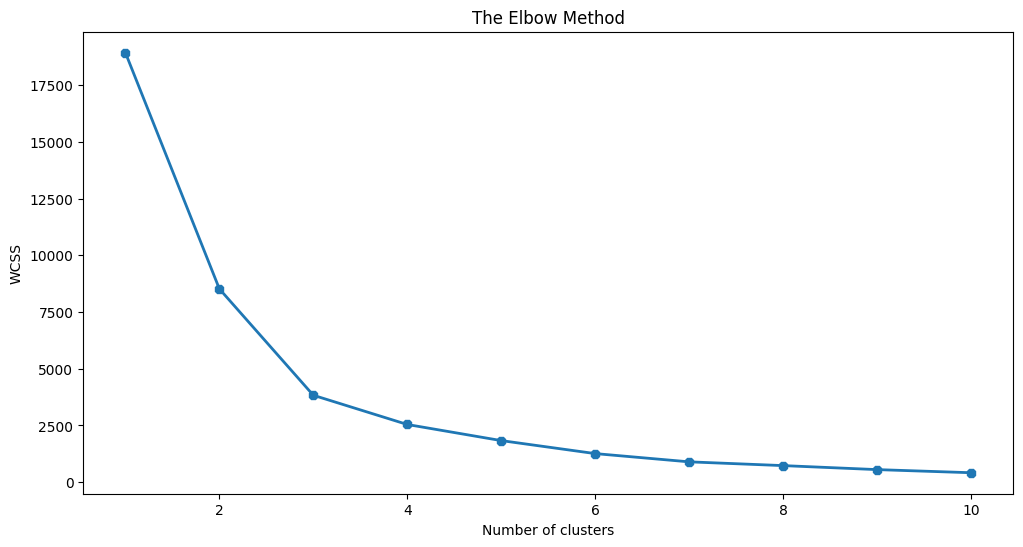

In [ ]:
X4= df2_without_outliers.loc[:,['Spots','Height(mm)']]

wcss=[]

# Select random observation as centroids - Choose the number of clusters (k) and select random for each cluster

for k in range (1,11):

  # call the classifier

  kmeans = KMeans(n_clusters=k, init='k-means++')

  # fit the model

  kmeans.fit(X4)

  # calculate squared error for the clustered points

  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss, linewidth=2, marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# predict the model
kmeans = KMeans(n_clusters=2)
labels= kmeans.fit(X4)

Text(0, 0.5, 'Height(mm)')

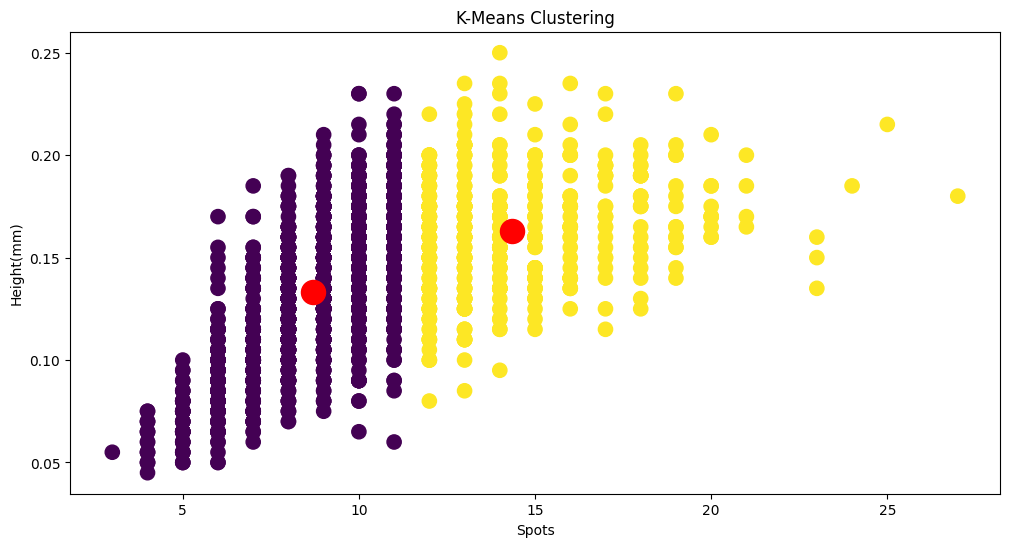

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X4['Spots'], X4['Height(mm)'], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Spots')
plt.ylabel('Height(mm)')

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
# Creating the 'Age' Column, 1 for "Young" and 0 for "Old"
df1_without_outliers['Age'] = (df1_without_outliers['SellWeight(g)'] > 0.3).astype(int)
df2_without_outliers['Age'] = (df2_without_outliers['SellWeight(g)'] > 0.3).astype(int)

In [ ]:
df1_without_outliers['Age'].value_counts()

Age
0    1425
1     586
Name: count, dtype: int64

In [ ]:
df2_without_outliers['Age'].value_counts()

Age
0    1386
1     632
Name: count, dtype: int64

In [ ]:
# Split Data for Logistic regression test on df1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

# Define features (X) and target (y)
X = df1_without_outliers[['Sex','Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)']]
y = df1_without_outliers['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the classification report
print (" Classification report")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print (" Confusion matrix")
print(cm)


 Classification report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       291
           1       0.86      0.85      0.86       112

    accuracy                           0.92       403
   macro avg       0.90      0.90      0.90       403
weighted avg       0.92      0.92      0.92       403

 Confusion matrix
[[276  15]
 [ 17  95]]


Accuracy: 0.92
Mean Squared Error: 0.08
R-squared: 0.60


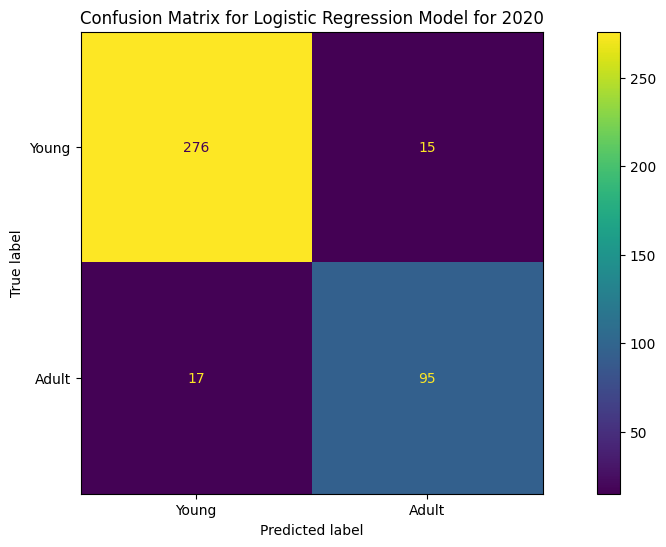

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error, r2_score

# Calculate the accuracy score
accuracy = model.score(X_test, y_test)

# Print the accuracy score with 2 decimal places
print(f"Accuracy: {accuracy:.2f}")

# Replace 'y_test' and 'y_pred' with your actual data
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Young', 'Adult'])
disp.plot()
plt.title('Confusion Matrix for Logistic Regression Model for 2020')

# Calculate and print Mean Squared Error (with 2 decimal places)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", f"{mse:.2f}")

# Calculate and print R-squared (with 2 decimal places)
r2 = r2_score(y_test, y_pred)
print("R-squared:", f"{r2:.2f}")

plt.show()

In [ ]:

X = df2_without_outliers[['Sex','Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)']]
y = df2_without_outliers['Age']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print (" Classification report")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print (" Confusion matrix")
print(cm)

 Classification report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       287
           1       0.83      0.90      0.86       117

    accuracy                           0.92       404
   macro avg       0.90      0.91      0.90       404
weighted avg       0.92      0.92      0.92       404

 Confusion matrix
[[266  21]
 [ 12 105]]


Accuracy: 0.92
Mean Squared Error: 0.08
R-squared: 0.60


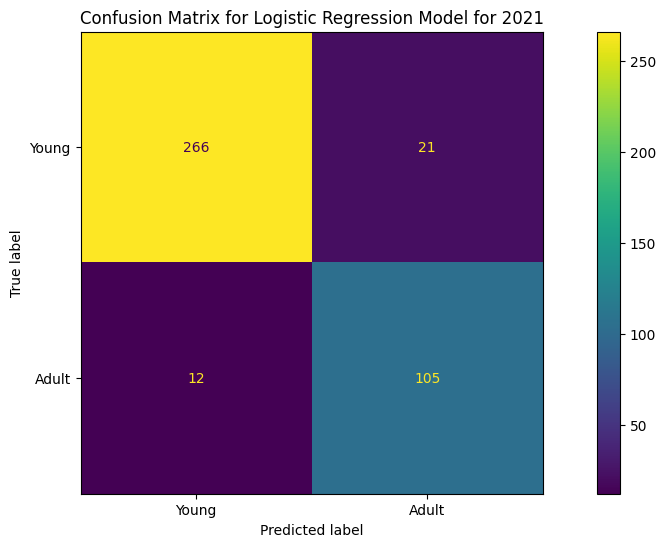

In [ ]:
accuracy = model.score(X_test, y_test)

print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Young', 'Adult'])
disp.plot()
plt.title('Confusion Matrix for Logistic Regression Model for 2021')

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", f"{mse:.2f}")

r2 = r2_score(y_test, y_pred)
print("R-squared:", f"{r2:.2f}")
plt.show()

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

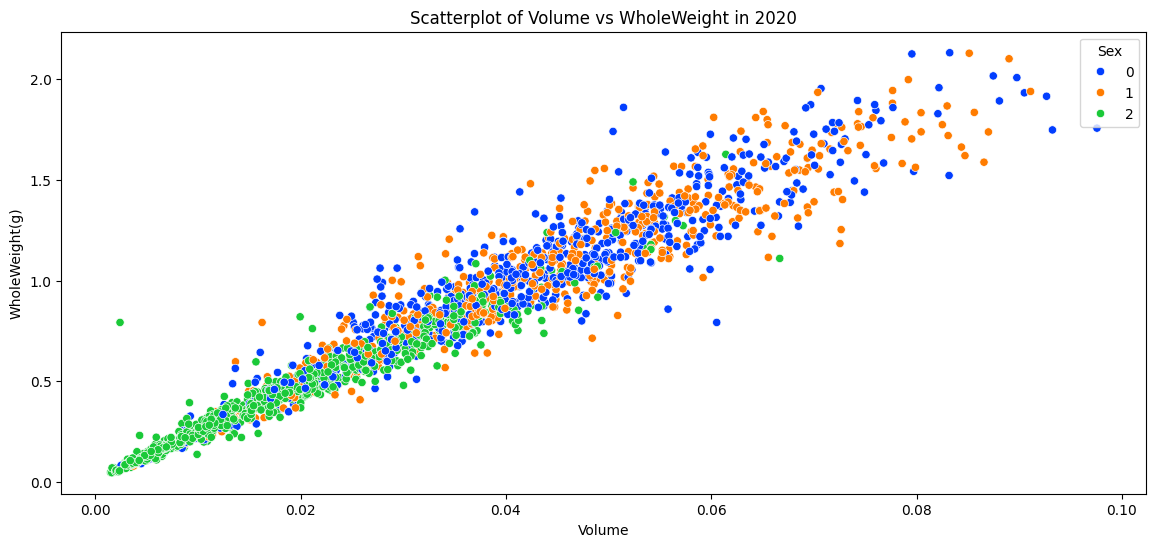

In [ ]:
# Calculate volume directly within the scatterplot function
sns.scatterplot(
    data=df1_without_outliers,
    x=df1_without_outliers['Length(mm)'] * df1_without_outliers['Diameter(mm)'] * df1_without_outliers['Height(mm)'],
    y='WholeWeight(g)',
    hue='Sex', palette='bright'
)

plt.xlabel('Volume')
plt.ylabel('WholeWeight(g)')
plt.title('Scatterplot of Volume vs WholeWeight in 2020')
plt.show()

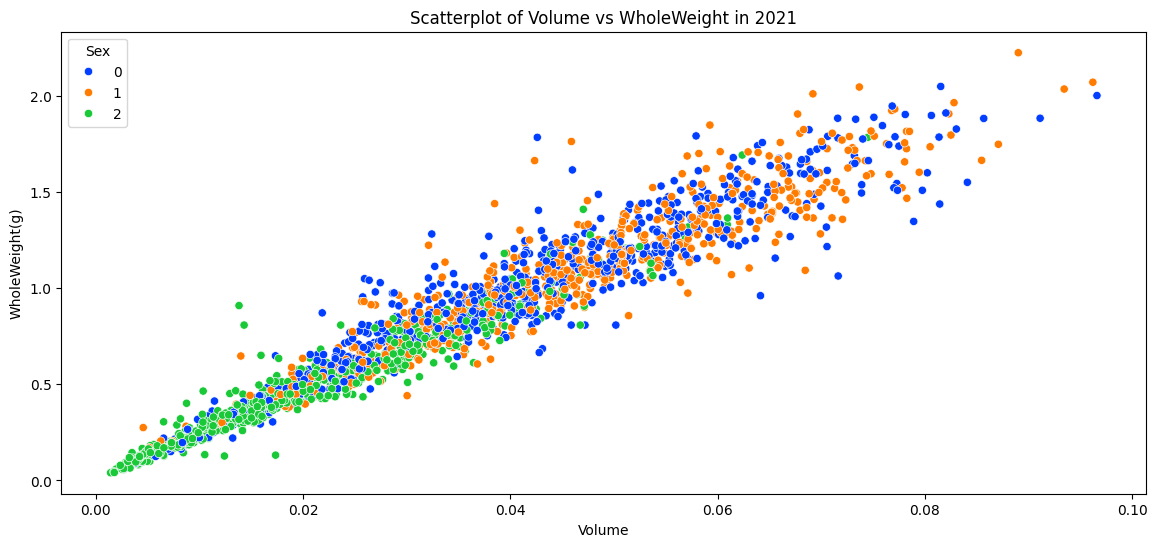

In [ ]:
# df2 volume scatterplot
sns.scatterplot(
    data=df2_without_outliers,
    x=df2_without_outliers['Length(mm)'] * df2_without_outliers['Diameter(mm)'] * df2_without_outliers['Height(mm)'],
    y='WholeWeight(g)',
    hue='Sex', palette='bright'
)

plt.xlabel('Volume')
plt.ylabel('WholeWeight(g)')
plt.title('Scatterplot of Volume vs WholeWeight in 2021')
plt.show()

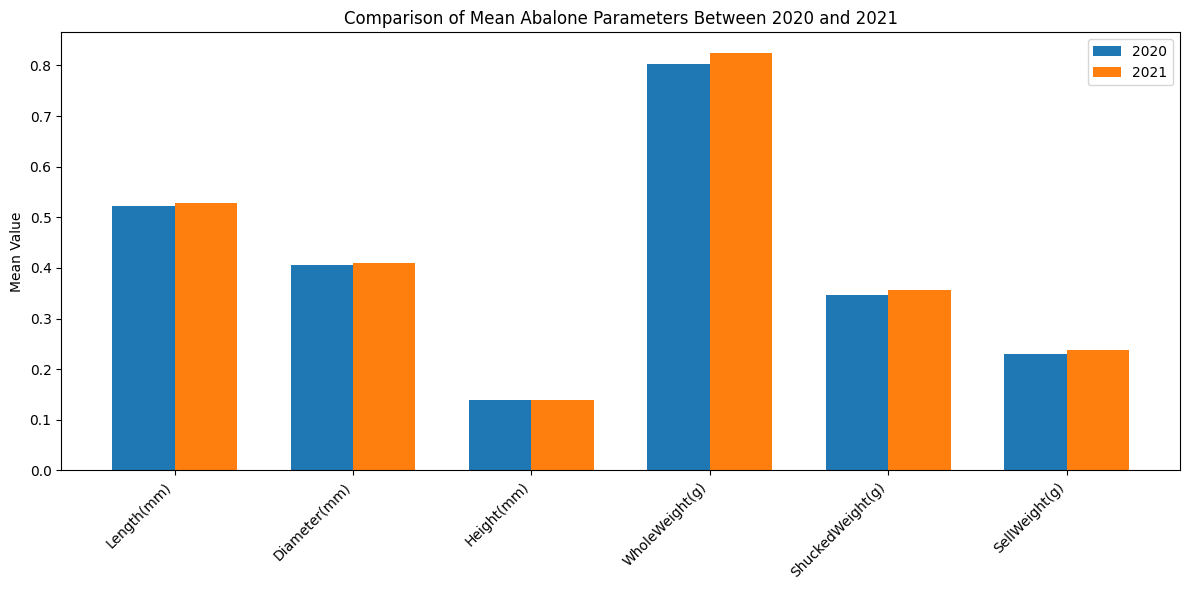

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
labels = ['Length(mm)', 'Diameter(mm)', 'Height(mm)', 'WholeWeight(g)', 'ShuckedWeight(g)', 'SellWeight(g)']
df1_means = [df1_without_outliers[col].mean() for col in labels]
df2_means = [df2_without_outliers[col].mean() for col in labels]

# Setting the positions and width for the bars
x = np.arange(len(labels))
width = 0.35

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df1_means, width, label='2020')
rects2 = ax.bar(x + width/2, df2_means, width, label='2021')

# Adding labels, title, and legend
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Mean Abalone Parameters Between 2020 and 2021')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

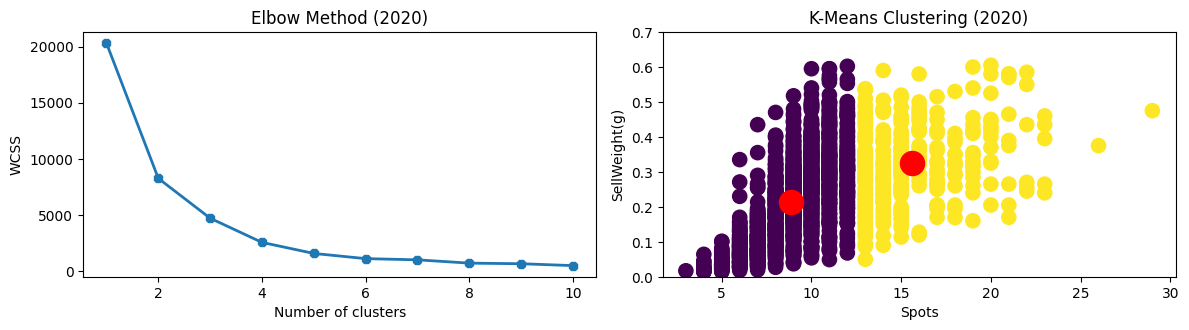

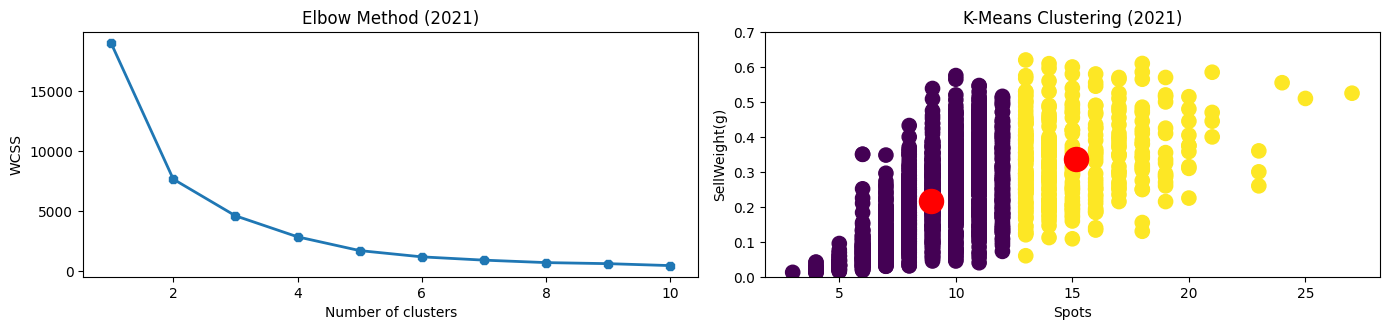

In [ ]:
# --- 2020 Data ---
X1 = df1_without_outliers.loc[:, ['Spots', 'SellWeight(g)']]
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# 2020 Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)  # First subplot for 2020 elbow method
plt.plot(range(1, 11), wcss, linewidth=2, marker='8')
plt.title('Elbow Method (2020)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

kmeans = KMeans(n_clusters=2)
kmeans.fit(X1)

# 2020 K-Means Clustering
plt.subplot(2, 2, 2)  # Second subplot for 2020 K-Means
plt.scatter(X1['Spots'], X1['SellWeight(g)'], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', s=300)
plt.title('K-Means Clustering (2020)')
plt.xlabel('Spots')
plt.ylabel('SellWeight(g)')
plt.ylim(0, 0.7)  # Set y-axis limit to match the 2021 plot
plt.tight_layout()
plt.show()

# --- 2021 Data ---
X2 = df2_without_outliers.loc[:, ['Spots', 'SellWeight(g)']]
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# 2021 Elbow Method
plt.subplot(2, 2, 3)  # Third subplot for 2021 elbow method
plt.plot(range(1, 11), wcss, linewidth=2, marker='8')
plt.title('Elbow Method (2021)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

kmeans = KMeans(n_clusters=2)
kmeans.fit(X2)

# 2021 K-Means Clustering
plt.subplot(2, 2, 4)  # Fourth subplot for 2021 K-Means
plt.scatter(X2['Spots'], X2['SellWeight(g)'], c=kmeans.labels_, s=105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', s=300)
plt.title('K-Means Clustering (2021)')
plt.xlabel('Spots')
plt.ylabel('SellWeight(g)')
plt.ylim(0, 0.7)  # Set y-axis limit to match the 2020 plot

plt.tight_layout()
plt.show()

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
##############################################################################################################################################################################################################################################################

In [ ]:
###############################################################################################################################

In [ ]:
###############################################################################################################################

In [ ]:
###############################################################################################################################

In [ ]:
###############################################################################################################################

In [ ]:
###############################################################################################################################

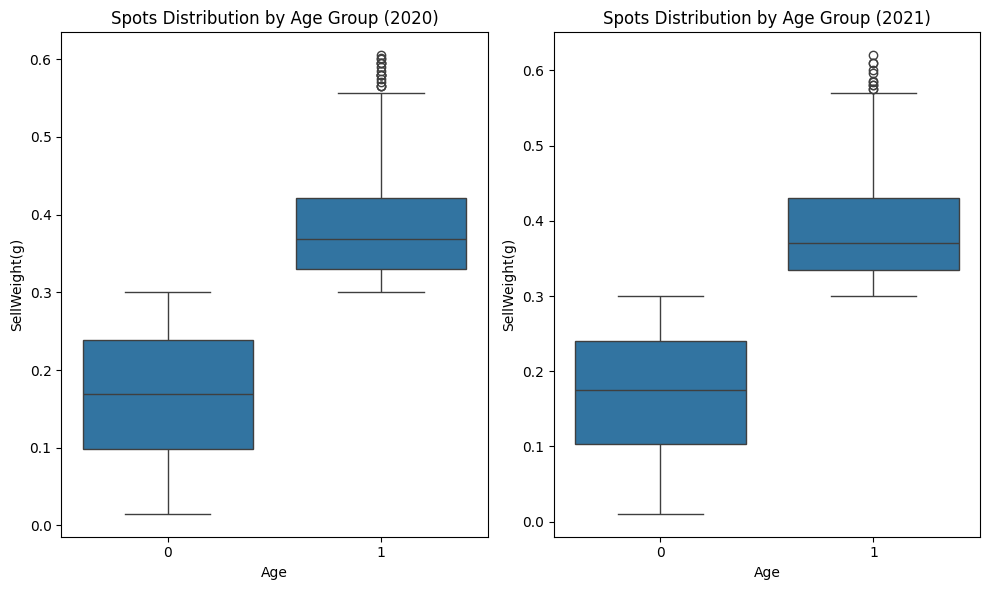

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Boxplot for 2020 data
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', y='SellWeight(g)', data=df1_without_outliers)
plt.title('Spots Distribution by Age Group (2020)')

# Boxplot for 2021 data
plt.subplot(1, 2, 2)
sns.boxplot(x='Age', y='SellWeight(g)', data=df2_without_outliers)
plt.title('Spots Distribution by Age Group (2021)')

plt.tight_layout()
plt.show()

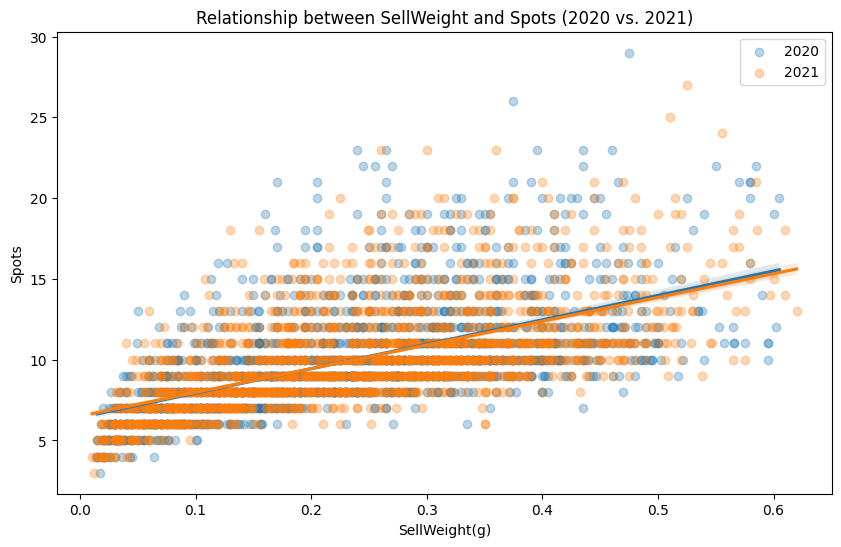

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatterplot for 2020 data with trend line
sns.regplot(x='SellWeight(g)', y='Spots', data=df1_without_outliers, label='2020', scatter_kws={'alpha':0.3})

# Scatterplot for 2021 data with trend line
sns.regplot(x='SellWeight(g)', y='Spots', data=df2_without_outliers, label='2021', scatter_kws={'alpha':0.3})

plt.title('Relationship between SellWeight and Spots (2020 vs. 2021)')
plt.legend()
plt.show()

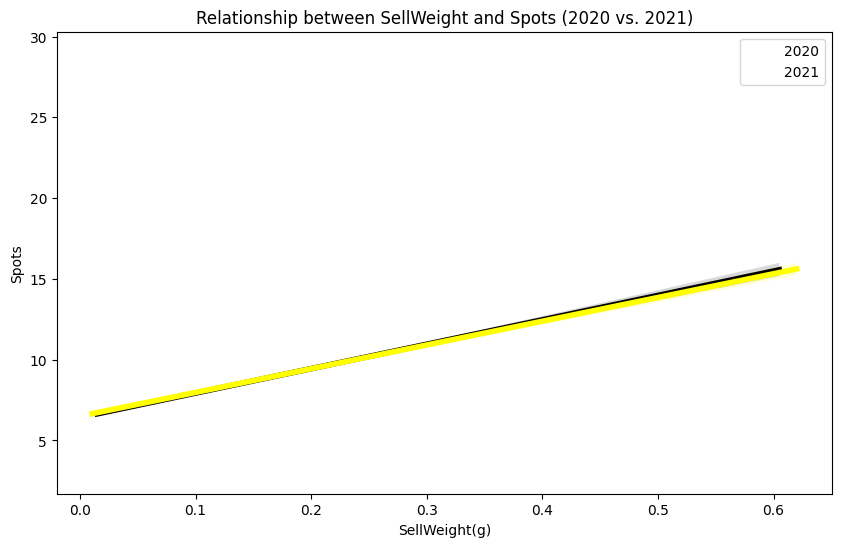

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatterplot for 2020 data with trend line (reduced alpha, thicker line)
sns.regplot(x='SellWeight(g)', y='Spots', data=df1_without_outliers, label='2020', scatter_kws={'alpha':0}, line_kws={'color': 'black', 'lw': 4})  # Increased 'lw' to 5

# Scatterplot for 2021 data with trend line (reduced alpha, thicker line)
sns.regplot(x='SellWeight(g)', y='Spots', data=df2_without_outliers, label='2021', scatter_kws={'alpha':0}, line_kws={'color': 'yellow', 'lw': 4})  # Increased 'lw' to 5

plt.title('Relationship between SellWeight and Spots (2020 vs. 2021)')
plt.legend()
plt.show()